# 설정

In [1]:
# 파이썬 ≥ 3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥ 0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 회귀

회귀는 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계적 기법으로, 현대 통계학을 떠받치고 있는 주요 기둥 중 하나다. 어떤 입력 데이터가 들어오면 연속적인 숫자(실수)를 예측하는 것이다. 이 모델을 훈련시키는 두 가지 방법을 설명하겠다.

<ul>
    <li>직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터(즉, 훈련 세트에 대해 비용 함수를 최소화하는 모델 파라미터)를 해석적으로 구한다.</li>
    <li>경사 하강법<sup>Gradient Descent</sup>이라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킨다. 결국에는 앞의 방법과 동일한 파라미터로 수렴한다. 경사 하강법의 변종으로 배치<sup>batch</sup>경사 하강법, 미니배치<sup>mini-batch</sup> 경사 하강법, 확률적 경사 하강법<sup>Stochastic Gradient Descent</sup>도 살펴보겠다.</li>
</ul>

회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭한다. 예를 들어 아파타의 방 개수, 방 크기, 주변 학군 등 여러 개의 독립변수에 따라 아파트 가격이라는 종속변수가 어떤 관계를 나타내는지를 모델링하고 예측하는 것이다. $\mathrm{Y} = \mathrm{W_1X_1}+ \mathrm{W_2X_2} + \cdots + \mathrm{W_nX_n}$이라는 선형 회귀식을 예로 들면 $Y$는 종속변수, 즉 아파트 가격을 뜻하고 $\mathrm{X_1, X_2,}\cdots\mathrm{,X_n}$은 방 개수, 방 크기, 주변 학군 등의 독립변수를 의미한다. 그리고 $\mathrm{W_1, W_2,}\cdots\mathrm{,W_n}$은 이 독립변수의 값에 영향을 미치는 회귀 계수<sup>Regression coefficients</sup>다. 머신러닝 관점에서 보면 독립변수는 피처에 해당하며 종속변수는 결정 값이다. <mark>머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 <b>최적의 회귀 계수</b>를 찾아내는 것이다.</mark>

회귀는 회귀 계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 여러 가지 유형으로 나눌 수 있다. 회귀에서 가장 중요한 것은 바로 회귀 계수다. 이 회귀 계수가 선형이냐 아니냐에 따라 선형 회귀와 비선형 회귀로 나눌 수 있다. 그리고 독립변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나뉜다.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-1wig">독립변수 개수</th>
    <th class="tg-1wig">회귀 계수의 결합</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">1개: 단일 회귀</td>
    <td class="tg-0lax">선형: 선형 회귀</td>
  </tr>
  <tr>
    <td class="tg-0lax">여러 개: 다중 회귀</td>
    <td class="tg-0lax">비선형: 비선형 회귀</td>
  </tr>
</tbody>
</table>

여러 가지 회귀 중에서 선형 회귀가 가장 많이 사용된다. 선형 회귀는 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식이다. 선형 회귀 모델은 규제<sup>Regularization</sup> 방법에 따라 다시 별도의 유형으로 나뉠 수 있다. 규제는 일반적인 선형 회귀의 과대적합 문데를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것을 말한다. 대표적인 선형 회귀 모델은 다음과 같다.

<ul>
    <li><b>일반 선형 회귀:</b> 예측값과 실제 값의 RSS<sup>Residual Sum of Squares</sup>를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제<sup>Regularization</sup>를 적용하지 않은 모델이다.</li>
    <li><b>릿지<sup>Ridge</sup>:</b> 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델이다. 릿지 회귀는 L2 규제를 적용하는데, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델이다.</li>
    <li><b>라쏘<sup>Lasso</sup>:</b> 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식이다. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것이다. 이러한 특성 때문에 L1 규제는 피처 선택 기능으로도 불린다.</li>
    <li><b>엘라스틱넷<sup>ElasticNet</sup>:</b>L2, L1 규제를 함께 결합한 모델이다. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정한다.</li>
    <li><b>로지스틱 회귀<sup>Logistic Regression</sup>:</b> 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델이다. 로지스틱 회귀는 매우 강력한 분류 알고리즘이다. 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보인다.</li>
</ul>

## 단순 선형 회귀

단순 선형 회귀는 독립변수도 하나, 종속변수도 하나인 선형 회귀다. 예를 들어, 주택 가격이 주택의 크기로만 결정된다고 하자. 일반적으로 주택의 크기가 크면 가격이 높아지는 경향이 있기 때문에 다음과 같이 주택 가격과 주택 크기에 대한 선형(직선 형태)의 관계로 표현할 수 있다.

<b>그림 1</b> 단순 선형 회귀
<div style="text-align:center;">
    <img src="./images/Regression/reg.png">
</div>

$\mathrm{X}$축이 주택의 크기 축(평당 크기)이고 $\mathrm{Y}$축이 주택의 가격 축인 2차원 평면에서 주택 가격은 특정 기울기와 절편을 가진 1차 함수식으로 모델링할 수 있다. 해당 문제의 선형 모델 공식은 다음과 같다.

$$
\hat{y} = w_0 + w_1\mathrm{X}
$$

독립변수가 1개인 단순 선형 회귀에서는 이 기울기 $w1$과 절편 $w_0$을 회귀 계수로 지칭한다(절편은 intercept이다). 독립변수와 종속변수 사이의 관계를 나타내는 선형 방정식의 가중치를 학습하는 것이 목적이다. 이 방정식으로 훈련 데이터셋이 아닌 새로운 샘플의 타깃 값을 예측할 수 있다. 그리고 회귀 모델을 위와 같은 1차 함수로 모델링했다면 실제 주택 가격은 이러한 1차 함수 값에서 실제 값만큼의 오류 값을 뺀(또는 더한) 값이 된다($w_0 + w_1\mathrm{X}$ + 오류 값).

이렇게 실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류, 즉 잔차라고 부른다. <mark>최적의 회귀 모델을 만든다는 것은 바로 전체 데이터의 잔차(오류 값, offset이라고도 한다) 합이 최소가 되는 모델을 만든다는 의미다. 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미도 된다.</mark>

<b>그림 2</b> 잔차
<div style="text-align:center;">
    <img src="./images/Regression/reg2.png">
</div>

오류 값은 +나 -가 될 수 있다. 그래서 전체 데이터의 오류 합을 구하기 위해 단순히 더했다가는 뜻하지 않게 오류 합이 크게 줄어들 수 있다. 따라서 보통 오류 합을 계산할 때는 절댓값을 취해서 더하는 MAE<sup>Mean Absolute Error</sup>, 오류 값의 제곱을 구해서 더하는 방식인 RSS<sup>Residual Sum of Square</sup>을 취한다. 일반적으로 미분 등의 계산을 편리하게 하기 위해서 RSS 방식으로 오류 합을 구한다. 즉, Error<sup>2</sup> = RSS이다.

<b>그림 3</b> RSS
<div style="text-align:center;">
    <img src="./images/Regression/reg3.png">
</div>

RSS는 이제 변수가 $w_0, w_1$인 식으로 표현할 수 있으며, 이 RSS를 최소로 하는 $w_0, w_1$, 즉 회귀 계수를 학습을 통해서 찾는 것이 머신러닝 기반 회귀의 핵심 사항이다. RSS는 회귀식의 독립변수 X, 종속변수 Y가 중심 변수가 아니라 w 변수(회귀 계수)가 중심 변수임을 인지하는 것이 매우 중요하다(학습 데이터로 입력되는 독립변수와 종속변수는 RSS에서 모두 상수로 간주한다). 일반적으로 RSS는 학습 데이터의 건수로 나누어서 다음과 같이 정규화된 식으로 표현된다.

$$
\text{RSS}(w_0, w_1) = \frac{1}{N}\sum_{i=1}^N(y_i - (w_0 + w_1x_1))^2
$$

회귀에서 이 RSS는 비용<sup>cost</sup>이며 w 변수(회귀 계수)로 구성되는 RSS를 비용함수라고 한다. 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(즉, 오류 값)을 지속해서 감소시키고 최종적으로 더 이상 감소하지 않는 최소의 오류 값을 구하는 것이다. 비용 함수를 손실 함수<sup>loss function</sup>라고도 한다.

### 단순 선형 회귀 모델의 통계적 평가

$\varepsilon$(오차)는 확률 변수로 두는 경우가 많다. 이 전제를 세울 때 단순 선형 회귀 모델은 확률 시스템이 되고 모델의 좋고 나쁨은 통계적 평가를 거치게 된다. 특히, $\varepsilon$이 정규분포를 따른다고 가정할 때의 평가지표는 이론적으로 입증되어 있다.

#### 회귀계수의 t검정

단순 선형 회귀 모델이 확률시스템이라는 가정 아래, 회귀계수는 확률 변수가 되고 표본마다 그 값이 변한다. 특히 계수 $w_0, w_1$의 값이 0인가의 여부를 문제로 하고 싶은 경우가 있다. 이를 위해 다음의 가설검정을 실시한다.

$$
H_0: \text{계수는 0이다.}\\
H_1: \text{계수는 0이 아니다.}
$$

여기에서 계수는 $w_0$, 또는 $w_1$ 모두를 나타내고, 각각 별도로 검정을 실시한다. 각 계수에 관한 검정은 $\varepsilon_i$의 분산을 이용하는 것이 되지만, 이 분산은 알지 못한다. 이 때문에 표본분산을 이용한 t 검정을 실시하게 된다. 각 계수에 대한 t검정통계량과 이것에 수반되는 값은 statsmodels이 계산하기 때문에 이 값을 보고 $H_0$를 기각할지의 여부를 판단할 수 있다.

#### 결정계수

<b>결정계수</b><sup>coefficient of determination</sup>는 $R^2$로 표현하고, 회귀 모델의 데이터에 대해서 적합한 정도를 나타내는 지표로 statsmodels가 계산한다. 결정 계수는 다음의 범위를 취한다.

$$
0 < R^2 \leq 1
$$

이 식이 1에 가까울수록 잘 적합되었다고 판단하고 독립변수가 종속변수를 잘 설명하고 있다고 말한다. 일반적으로 자주 언급되지만 $R^2$가 0.6이하라면 좋지 않지만 0.8 이상이라면 어느 정도 좋은 모델이라고 판단된다. 하지만 이 값은 절대적 평가가 아니므로 0.6 이하라면 절대로 안 되고 0.8 이상이라면 절대로 좋은 것이라고 말할 수 없다. 결정계수 $R^2$의 값은 절대적인 지표가 아니라 어디까지나 기준이라는 것을 인식하는 것이 좋다.

#### 가계 동향 조사

가계 동향 조사(통계청)의 Web 사이트에서 2인 이상 세대의 연간 수입에 대해, 1개월당 지출과 엥겔계수 각각에 대한 단순 회귀 분석을 실시한다. 가공한 데이터를 다음에 제시한 URL로 액세스하여 이 데이터를 읽어 들인다.

In [2]:
import statsmodels.formula.api as smf
import pandas as pd

url = 'https://sites.google.com/site/datasciencehiro/datasets/FamilyIncome.csv'
df = pd.read_csv(url, comment='#')
df.head()

,income,expenditure,engel
0,216,172462,30.8
1,304,204599,29.9
2,356,224776,28.8
3,413,240153,27.8
4,481,255497,27.3


데이터의 내용은 위와 같이 income(연간 수입 [10만 원]), expenditure(월간 지출), engel(엥겔계수)이 나열되었다. index의 값은 income의 순위 0(최저 수입) ~ 9(최고 수입)의 10등급을 의미한다.

이 데이터에서 독립 변수를 income, 종속 변수를 expenditure로 하는 단순회귀분석은 다음과 같이 기술한다

In [3]:
result = smf.ols('expenditure ~ income', data=df).fit()
w0, w1 = result.params
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            expenditure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     624.7
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           7.02e-09
Time:                        14:19:38   Log-Likelihood:                -105.43
No. Observations:                  10   AIC:                             214.9
Df Residuals:                       8   BIC:                             215.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.4e+05   6550.516     21.366      0.0

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


여기에서 변수 w0, w1에는 단순 선형 회귀 모델의 절편항과 기울기가 반환된다. 또한, <code>smf.ols()</code>는 최소제곱법을 이용한 계산을 수행하고 인수 파라미터의 제공 방식은 R 언어 스타일의 표기법을 따른다.

<ul>
    <li>OLS(최소 제곱법)를 이용한 회귀분석 결과이고 목적변수(Dep. Variable)는 expenditure이다.</li>
    <li>R-squared: 결정계수 $R^2$의 값은 0.987이다.</li>
    <li>Intercept: 절편항, coef(계수값)는 1.4 x 10<sup>5</sup>, t는 계수에 관한 검정통계량의 값, P > |t|는 t 검정에서 p값이 0.000임을 나타내고 있다. 유의수준을 5%(0.05)로 할것까지도 없이 이 계수가 0이라는 가설은 기각된다. 즉, 이 값은 유의하게 존재한다고 할 수 있다.</li>
    <li>income: 독립 변수 income의 계수에 대해서, 그 계수값, p값 등이 표시된다. 이것도 계수값이 0이 아님을 나타내고 있다. </li>
    <li>std err(계수값의 산포도를 나타내는 표준편차), [0.025, 0.975] (유의수준 5%로 할 때의 계수의 구간추정, 계수의 하한값과 상한값)</li>
</ul>

이 결과에 의해, 구해진 단순 선형 회귀 모델은 다음과 같다.

$$
\text{expenditure} = w0 + w1 \times \text{income}
$$

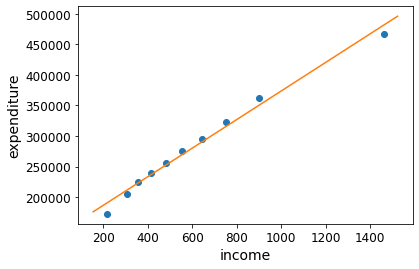

In [4]:
plt.plot(df['income'], df['expenditure'], 'o')
start, end = plt.xlim()
plt.plot(np.arange(start, end, 0.1), w0 + w1 * np.arange(start, end, 0.1))
plt.xlabel('income'); plt.ylabel('expenditure')
plt.show()

이 그래프를 보고, 구해진 단순 선형 회귀 모델이 좋은 지표가 된다고 판단한다면, 데이터에는 없는 연간 수입이 1억 1,000만 원, 1억 2,000만 원인 가정의 월 지출액을 예측할 수 있을 것이다.

In [5]:
NewData = {'income': [1100, 1200]}
Newdf = pd.DataFrame(NewData)
pred = result.predict(Newdf)
pred

0    397198.498402
1    420584.101981
dtype: float64

#### 심슨의 역설

회귀분석을 바로 수행하지 않고, 그 전의 데이터 가시화도 포함하여 몇 가지 통계량을 살펴보고 나서 회귀분석을 실시한 뒤에 사전분석과 대조하여 확인한 후 결과를 평가하는 것이 바람직하다.

이것을 게을리하여 잘못을 범하는 대표적인 예로 통계학에서 유명한 심슨의 역설<sup>Simpson's paradox</sup>이 있다. 이것은 모집단의 상관과 부분집단의 상관이 다른 경우가 있고 부분집단에서의 가설이나 통계분석 결과가 모집단과는 정반대의 결과가 나오는 것을 지적하고 있다.

#### 수학적 설명

엄밀한 수학에 의한 증명이나 도출을 수행하지 않고, 수식으로 표현된 항목이나 지표를 어떻게 생각하면 좋은가라는 <b>판단력을 기르는</b> 것에 초점을 맞추어 설명한다.

우선 다음과 같이 설정한다.

<b>취득 데이터:</b> $\left\{x_i, y_i\right\}\,(i=1, ..., N)$<br>
<b>실제 시스템:</b> $y_i = w_0 + w_1x_i + \varepsilon_i,\,\varepsilon_i \sim N(0, \sigma^2)$<br>
<b>회귀 모델:</b> $\hat{y}_i = \hat{w}_0 + \hat{w}_1x_i$<br>
<b>$x, y$의 표본평균:</b> $\hat{\mu}_x, \hat{\mu}_y$

##### 회귀계수의 성질

앞에 기술한 가정 하에 추정한 회귀계수의 성질은 다음과 같다.

<b>불편추정량:</b>

$$
E[\hat{w}_0] = w_0,\, E[\hat{w}_1] = w_1
$$

<b>일치추정량:</b> $N \to \infty$일 때 아래 계수의 분산은 0에 가까워진다.

$$
\sigma^2_{\hat{w}_0} = \mathrm{V}[\hat{w}_0] = (\frac{1}{N} + \frac{\hat{\mu}_x^2}{\sum_{i=1}^N(x_i - \hat{\mu}_x)})\sigma^2\,\,\,\,\text{(1)}
$$

$$
\sigma_{\hat{w}_1}^2 = \mathrm{V}[\hat{w}_1] = \frac{\sigma^2}{\sum_{i=1}^N(x_i - \hat{\mu}_x)}\,\,\,\,\text{(2)}
$$

<b>정규성:</b>

$$
\hat{w}_0 \sim N(w_0, \mathrm{V}[\hat{w}_0]),\,\,\,\hat{w}_1 \sim N(w_1, \mathrm{V}[\hat{w}_1])
$$

이러한 성질 중에서 불편추정량과 일치추정량은 유용하게 이용된다.

##### 회귀계수의 검정

추정한 회귀계수의 검정 개요를 기술한다. 우선 $\hat{w}_1$을 대상으로 고려한다. 이것은 어느 특정값 $w_1$과 동일한가의 여부에 대한 검정을 고려한다. 이 경우의 가설은 $H_0: \hat{w}_1 = w_1, H_1 = \hat{w}_1 \neq w_1$이다.

모분산 $\sigma^2$를 알지 못하므로 대신 다음의 $\sigma^2$을 이용한다.

$$
\varepsilon_i = y_i - \hat{y}_i = y_i - (\hat{w}_0 + \hat{w}_1x_i)
$$

$$
\hat{\sigma}^2 = \frac{1}{N - 2}\sum_{i=1}^N\varepsilon_i^2
$$

두 번째 식에서 N - 2로 나눈 이유는 회귀계수를 최소제곱법으로 구할 때 $\varepsilon_i$의 총합은 0, 또한 변수 벡터와 계수 벡터의 내적을 0으로 한다는 두 가지 제약이 가해져서 자유도가 2만큼 줄어들기 때문이다.

식 (2)의 $\sigma^2$대신 $\hat{\sigma}^2$을 이용하여 $\mathrm{V}[\hat{w}_1](\hat{\sigma}^2)$으로 나타낸다. 이것을 이용하여 $\hat{w}_1$의 검정통계량을 다음 식으로 나타낸다.

$$
t_{w_1} = \frac{\hat{w}_1 - w_1}{\sqrt{\mathrm{V}[\hat{w}_1](\hat{\sigma}^2)}}\sim t(N - 2)
$$

이 $t_{w_1}$은 통계의 검정에서 나타나는 것과 동일한 형식이기 때문에 검정과 동일한 검정절차 $w_0$를 수행하게 된다. 다만 자유도 N - 2인 t분포를 따르는 것에 주의하기 바란다.

$w_0$에 관해서도 동일한 검정을 수행할 수 있는 검정통계량이 도출된다. statsmodels의 회귀분석에서는 $w_0 = w_1 = 0$으로 두고 $w_0$ 및 $w_1$이 개별적으로 0이 되는가에 여부에 대한 검정을 수행하고 그 결과를 P > |t|로 나타낸다.

##### 결정계수 R<sup>2</sup>

결정계수는 다음 식으로 정의된다.

$$
R^2 = \frac{\sum_{i=1}^N(\hat{y}_i - \hat{\mu}_y)^2}{\sum_{i=1}^N(y_i - \hat{\mu}_y)^2} = 1 - \frac{\sum_{i=1}^N(y_i - \hat{y}_i)^2}{\sum_{i=1}^N(y_i - \hat{\mu}_y)^2}\,\,\,(0\leq R^2 \leq 1)
$$

가운데 식을 보면 분자가 모델 출력 $\hat{y}$의 분산, 분모가 시스템 출력 $y$의 분산이라고 볼 수 있고 분산비를 나타내고 있다. 이것을 통계에서는 변동비라고 부른다. 따라서 최적적합의 $R^2 = 1$이라는 것은 분산이 동일하다는 것을 기술하고 있다. 통계량인 분산이나 평균이 동일하더라도, 다른 데이터 계열을 나타내는 경우는 자주 있다. 따라서 이것만을 살펴보면 $R^2$가 잘 적합되었다는 것을 나타내는 지표가 될 수 없다.

그러나 오른쪽 식의 두 번째 항 분자를 보면 시스템과 모델 출력의 오차분산을 측정하고 이것은 일치성을 측정하는 지표이므로 이 관점으로부터 $R^2$가 잘 적합되었다는 것을 나타내는 지표가 된다는 것을 알 수 있다.

가운데 식이 도움이 안 되는가하면 그렇지도 않다. 세상에는 적합보다는 분산비(즉, 에너지비)를 중요시하는 분야도 있고 이러한 관점에서 보면 유용한 표현이다.

## 선형 회귀

앞서 독립 변수가 하나인 단순 선형 회귀로 선형 회귀의 개념을 잠깐 살펴보았다. 이제는 독립 변수를 여러 개로 확장시켜서 일반화해보자.

더 일반적으로 선형 모델은 입력 특성의 가중치 합과 <b>편향</b><sup>bias</sup>(또는 <b>절편</b><sup>intercept</sup>)이라는 상수를 더해 예측을 만든다.

$$
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_mx_m
$$

<ul>
    <li>$\hat{y}$는 예측값이다.</li>
    <li>$m$은 특성의 수다.</li>
    <li>$x_i$는 $i$번째 특성값이다.</li>
    <li>$\theta_j$는 $j$번째 모델 파라미터다(편향 $\theta_0$과 특성의 가중치 $\theta_1, \theta_2, \cdots, \theta_m$을 포함한다).</li>
</ul>

이 식은 다음 식처럼 벡터 형태로 더 간단하게 쓸 수 있다.

$$
\hat{y} = h_{\theta}(\mathrm{x}) = \mathrm{\theta\cdot x}
$$

<ul>
    <li>$\mathrm{\theta}$는 편향 $\theta_0$과 $\theta_1$에서 $\theta_m$까지의 특성 가중치를 담은 모델의 파라미터 벡터다.</li>
    <li>$\mathrm{x}$는 $x_0$에서 $x_m$까지 담은 샘플의 <b>특성 벡터</b>다. $x_0$는 항상 1이다.<sup><a id="a01" href="#p01">[1]</a></sup></li>
    <li>$\mathrm{\theta\cdot x}$는 벡터 $\theta$와 $\mathrm{x}$의 점곱이다. 이는 $\theta_0x_0+\theta_1x_1+\cdots+\theta_mx_m$와 같다.</li>
    <li>$h_{\theta}$는 모델 파라미터 $\theta$를 사용한 가설<sup>hypothesis</sup>함수다.</li>
</ul>

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: green"><strong>NOTE_</strong></span>머신러닝에서는 종종 벡터를 하나의 열을 가진 2D 배열인 <b>열 벡터</b><sup>column vector</sup>로 나타낸다. $\theta$와 $\mathrm{x}$가 열 벡터라면 예측은 $\hat{y} = \theta^T\mathrm{x}$이다. 여기에서 $\theta^T$는 $\theta$의 전치<sup>Transpose</sup>이다(열 벡터가 아니라 행 벡터가 된다). $\theta^T\mathrm{x}$는 $\theta^T$와 $\mathrm{x}$의 행렬 곱셈이다. 물론 예측 결과는 같지만 스칼라 값이 아니라 하나의 원소를 가진 행렬이 만들어진다.
</div>

이것이 선형 회귀 모델이다. 이제 선형 회귀 모델을 훈련시켜보자. 모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다. 이를 위해 먼저 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 한다. 회귀에 가장 널리 사용되는 성능 측정 지표는 평균 제곱근 오차<sup>RMSEM</sup>이다. 그러므로 선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 $\theta$를 찾아야 한다. 실제로는 RMSE보다 평균 제곱 오차<sup>mean square error</sup>(MSE)를 최소화하는 것이 같은 결과를 내면서(어떤 함수를 최소화하는 것은 그 함수의 제곱근을 최소화하는 것과 같으므로) 더 간단하다.<sup><a id="a02" href="#p02">[2]</a></sup>

훈련 세트 $\mathrm{X}$에 대한 선형 회귀 가설 $h_{\theta}$의 MSE는 다음 식처럼 계산한다.

$$
\text{MSE}(\mathrm{X}, h_{\theta}) = \frac{1}{n}\sum_{i=1}^n(y^{(i)} - \theta^T\mathrm{x}^{(i)})^2
$$

## 회귀 모델의 확률적 해석

앞서 말했듯, 회귀 문제는 여러 독립 변수와 종속 변수의 관계를 연속 함수 형태로 분석하는 문제이다. 관측 항목을 독립 변수화 종속 변수로 나누고 이들의 관계를 함수 형태로 분석한다. 데이터를 관측할 때 발생하는 관측 오차 또는 실험 오차는 <b>가우시안 분포</b><sup>Gaussian distribution</sup>로 정의되므로, 회귀 문제는 가우시안 분포를 예측하는 모델로 정의할 수 있다.

관측 데이터를 수집할 때마다 값이 조금씩 달라지는데 이런 변동분을 관측 오차<sup>observational error</sup>라고 한다. 관측 오차를 노이즈<sup>noise</sup>라고도 한다.

### 가우시안 분포

가우시안 분포는 평균을 중심으로 대칭적인 종 모양의 사건이 발생할 확률을 나타내며 다음과 같은 식으로 정의한다.

$$
N(x|\mu,\,\sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

$x$는 확률 변수, $\mu$는 평균, $\sigma^2$는 분산, $\sigma$는 표준편차다. 가우시안 분포는 관측 데이터의 분포를 근사하는 데에 자주 쓰인다. 중심 극한 정리<sup>central limit therem</sup>에 따라 독립적인 확률 변수들의 평균은 가우시안 분포에 가까워지는 성질이 있기 때문이다.

<b>그림 4</b> 가우시안 분포
<div style="text-align:center;">
    <img src="./images/Regression/GD.jpg">
</div>

### 회귀 모델 정의

회귀 문제를 확률 모델로 정의해 보자. 관측 데이터는 $D = \left\{(x_i, t_i): i=1, ..., N\right\}$로 N개의 $(x_i, t_i)$ 샘플로 구성된다. 입력 데이터 $x_i$는 같은 분포에서 독립적으로 샘플링되어 i.i.d를 만족한다고 하자. 타깃 $t_i$는 모델 예측값 $y(x_i; \theta)$에 관측 오차 $\varepsilon$가 더해진 값으로 정의되며 관측 오차 $\varepsilon$는 가우시안 분포 $N(\varepsilon|0,\,\beta^{-1})$를 따른다고 가정한다. 이때 오차의 분산 $\beta^{-1}$는 정밀도<sup>precision</sup> $\beta$의 역수로 상수로 가정한다.

분산과 정밀도는 서로 역수 관계다. 즉, 분산이 크면 정밀하지 않은 것으로 생각하고, 분산이 작으면 정밀한 것으로 생각할 수 있다.

여기서는 설명을 간단히 하기 위해서 회귀 문제의 타깃이 실수라고 가정하고 설명하고 있지만 일반적으로 타깃은 다차원 공간의 연속 함수에 있는 한 점이다. 이는 실수 벡터로 표현하며 타깃의 분포는 다변량 가우시안 분포가 된다.

$$
t_i = y(x_i;\,\theta) + \varepsilon,\,\varepsilon \sim N(\varepsilon|0, \beta^{-1})
$$

다음 그림에서 회색 점은 관측 데이터의 타깃 $t_i$이다. 입력 $x_i$마다 관측 데이터인 타깃 $t_i$의 가우시안 분포가 달라진다. 예를 들어 $x_i$를 집값을 예측하기 위한 입력인 '방이 3개, 32평, 아파트, 역과의 거리가 20분 거리'라고 하면 회색 점들은 집값 관측 데이터인 $t_i$이다. 따라서 동일한 입력 $x_i$마다 여러 회색 점들이 존재하므로 집값의 분포를 이루게 된다.

<b>그림 5</b> 회귀 문제에서 확률 모델의 가우시안 분포 예측
<div style="text-align:center;">
    <img src="./images/Regression/회귀모델의 가우시안분포.jpg">
</div>

따라서 회귀 모델은 입력 $x_i$가 주어졌을 때 타깃 $t_i$의 조건부 확률분포인 $p(t_i|x_i;\,\theta)$를 예측한다. 관측 오차 $\varepsilon$은 가우시안 분포 $N(\varepsilon|0,\,\beta^{-1})$로 가정했기 때문에 타깃 $t_i$의 분포는 관측 오차의 분산 $\beta^{-1}$를 갖는 가우시안 분포 $N(t_i|y(x_i;\,\theta), \beta^{-1})$로 정의된다. 따라서 신경망 모델은 평균 $y(x_i;\,\theta)$만 예측하면 된다.

### 잔차와 $\varepsilon$의 차이

$\varepsilon = y - E(y)$로 모델 파라미터를 추정하기 전에 세우는 가설로, $\varepsilon \sim N(0, \sigma^2)$이다. 이는 확률오차라고 한다.

$e = y - \hat{y}$으로 모델 파라미터를 추정 후 계산한 실제 값이다.

즉, 잔차 e는 확률오차 $\varepsilon$이 실제로 구현된 값이다.

## 정규방정식

비용 함수를 최소화하는 $\theta$값을 찾기 위한 <b>해석적인 방법</b>이 있다. 다른 말로 하면 바로 결과를 얻을 수 있는 수학 공식이 있다. 이를 <b>정규방정식</b><sup>normal equation</sup>이라고 한다.

$$
\hat{\theta} = (\mathrm{X^TX})^{-1}\mathrm{X^Ty}
$$

<ul>
    <li>$\hat{\theta}$는 비용 함수를 최소화하는 $\theta$값이다.</li>
    <li>$\mathrm{y}$는 $y_1$부터 $y_n$까지 포함하는 타깃 벡터다.</li>
</ul>

회귀 계수에 대한 unbiased estimator 중 가장 분산이 작은 estimator(Best Linear Unbiased Estimator, BLUE

이 공식을 테스트하기 위해 선형처럼 보이는 데이터를 생성하겠다.

그림 저장: generated_data_plot


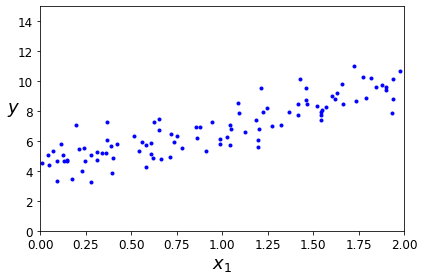

In [6]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

그럼 이제 정규방정식을 사용해 $\hat{\theta}$을 계산해보겠다. 넘파이 선형대수 모듈(np.linalg)에 있는 <code>inv()</code> 함수를 사용해 역행렬을 계산하고 <code>dot()</code> 메서드를 사용해 행렬 곱셈을 하겠다.

In [7]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

이 데이터를 생성하기 위해 사용하는 함수는 $y = 4 + 3x_1 + \text{가우시안_잡음}$이다. 정규방정식으로 계산한 값을 확인해보겠다.

In [8]:
theta_best

array([[4.21509616],
       [2.77011339]])

$\theta_0=4.215$와 $\theta_1=2.770$ 대신 $\theta_0=4$와 $\theta_1=3$을 기대했었다. 매우 비슷하지만 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못했다.

$\hat{\theta}$을 사용해 예측을 해보겠다.

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

모델의 예측을 그래프에 나타내보겠다.

그림 저장: linear_model_predictions_plot


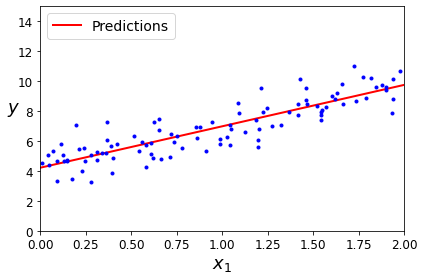

In [10]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

사이킷런에서 선형 회귀를 수행하는 것은 간단하다.<sup><a id="a03" href="p03">[3]</a></sup>

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [12]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

LinearRegression 클래스는 <code>scipy.linalg.lstsq()</code> 함수('최소 제곱<sup>least squares</sup>'에서 이름을 따왔다)를 기반으로 한다. 이 함수를 직접 호출할 수 있다.

In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

이 함수는 $\hat{\theta} = \mathrm{X^+y}$을 계산한다. 여기에서 $\mathrm{X^+}$는 $\mathrm{X}$의 <b>유사역행렬</b><sup>pseudoinverse</sup>이다(정확하게는 무어-펜로즈<sup>Moore-Penrose</sup> 역행렬이다). <code>np.linalg.pinv()</code> 함수를 사용해 유사역행렬을 직접 구할 수 있다.

In [14]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

유사역행렬 자체는 <b>특잇값 분해</b><sup>singular value decomposition</sup>(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산된다. SVD는 훈련 세트 행렬 $\mathrm{X}$를 3개의 행렬 곱셈 $\mathrm{U\Sigma V^T}$로 분해한다(<code>numpy.linalg.svd()</code>를 참고). 유사역행렬은 $\mathrm{X^+} = \mathrm{V\Sigma U^T}$로 계산된다. $\Sigma^+$를 계산하기 위해 알고리즘이 $\Sigma$를 먼저 구하고 그다음 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꾼다. 그다음 0이 아닌 모든 값을 역수로 치환한다. 마지막으로 만들어진 행렬을 전치한다. 정규방정식을 계산하는 것보다 이 방식이 훨씬 효율적이다. 또한 극단적인 경우도 처리할 수 있다. 실제로 $n < m$이거나 어떤 특성이 중복되어 행렬 $\mathrm{X^TX}$의 역행렬이 없다면(즉, 특이 행렬이라면) 정규방정식이 작동하지 않는다. 하지만 유사역행렬은 항상 구할 수 있다.

## 계산 복잡도

정규방정식은 $(m + 1)\times(m + 1)$ 크기가 되는 $\mathrm{X^TX}$의 역행렬을 계산한다($m$은 특성 수). 역행렬을 계산하는 <b>계산 복잡도</b><sup>computational complexity</sup>는 일반적으로 $O(m^{2.4})$에서 $O(m^3)$ 사이다(구현 방법에 따라 차이가 있다). 다시 말해 특성 수가 두 배로 늘어나면 계산 시간이 대략 $2^{2.4} = 5.3$에서 $2^3 = 8$배로 증가한다.

사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 $O(m^2)$이다. 특성의 개수가 두 배로 늘어나면 계산 시간이 대략 4배가 된다.

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: red"><strong>CAUTION_</strong></span>정규방정식과 SVD 방법 모두 특성 수가 많아지면 (예를 들어 100,000) 매우 느려진다. 다행인 것은 훈련 세트의 샘플 수에 대해서는 선형적으로 증가한다(둘 다 $O(n)$이다).<sup><a id="a04" href="#p04">[4]</a></sup> 따라서 메모리 공간이 허락된다면 큰 훈련 세트도 효율적으로 처리할 수 있다.</div>

또한 (정규방정식이나 다른 알고리즘으로) 학습된 선형 회귀 모델은 예측이 매우 빠르다. 예측 계산 복잡도는 샘플 수와 특성 수에 선형적이다. 다시 말해 예측하려는 샘플이 두 배로 늘어나면(또는 특성이 두 배로 늘어나면) 걸리는 시간도 거의 두 배 증가한다.

이제 아주 다른 방법으로 선형 회귀 모델을 훈련시켜보겠다. 이 방법은 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합하다.

# 경사 하강법

<b>경사 하강법</b><sup>gradient descent</sup>(GD)은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다.  경사 하강법의 사전적 의미인 '점진적인 하강'이라는 뜻에서도 알 수 있듯이, '점진적으로' 반복적인 계산을 통해 $\theta$ 파라미터 값을 업데이트하면서 오류 값이 최소(즉 비용 함수를 최소화하는)가 되는 $\theta$ 파라미터를 구하는 방식이다.

경사 하강법은 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 $\theta$ 파라미터를 지속해서 보정해 나간다. 최초 오류 값이 100이었다면 두 번째 오류 값은 100보다 작은 90, 세 번째는 80과 같은 방식으로 지속해서 오류를 감소시키는 방향으로 $\theta$ 값을 계속 업데이터해 나간다. 그리고 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 $\theta$ 값을 최적 파라미터로 반환한다.

강조하지만, 경사 하강법의 핵심은 "어떻게 하면 오류가 작아지는 방향으로 $\theta$ 값을 보정할 수 있을까?"이다. 비용 함수가 다음 그림과 같은 포물선 형태의 2차 함수라면 경사 하강법은 최초 임의의 값(<b>무작위 초기화</b><sup>random initialization</sup>라고 한다) $\theta$에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 $\theta$를 업데이터한다. 마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 $\theta$를 반환한다.

<b>그림 6</b> 이 경사 하강법 그림에서 모델 파라미터가 무작위하게 초기화된 후 반복적으로 수정되어 비용 함수를 최소화한다. 학습 스텝 크기는 비용 함수의 기울기에 비례한다.  따라서 파라미터가 최솟값에 가까워질수록 스텝 크기가 점진적으로 줄어든다.
<div style="text-align:center;">
    <img src="./images/Regression/gd_image.png">
</div>

경사 하강법에서 중요한 파라미터는 스텝의 크기로, <b>학습률</b><sup>learning rate</sup> 하이퍼파라미터로 결정된다. 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다(그림 7).

<b>그림 7</b> 학습률이 너무 작을 때
<div style="text-align:center;">
    <img src="./images/Regression/low_lr.png">
</div>

학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 올라가게 될지도 모른다. 이는 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 한다(그림 8).

<b>그림 8</b> 학습률이 너무 클 때
<div style="text-align:center;">
    <img src="./images/Regression/high_lr.png">
</div>

모든 비용 함수가 매끈한 그릇과 같지는 않다. 패인 곳, 산마루, 평지 등 특이한 지형이 있으면 최솟값으로 수렴하기 매우 어렵다. [그림 9]는 경사 하강법의 두 가지 문제점을 보여준다. 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 <b>전역 최솟값</b><sup>global minimum</sup>보다 덜 좋은 <b>지역 최솟값</b><sup>local minimum</sup>에 수렴한다. 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못한다.

<b>그림 9</b> 경사 하강법의 문제점
<div style="text-align:center;">
    <img src="./images/Regression/gd_pro.png">
</div>

다행시 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 <b>볼록 함수</b><sup>convex function</sup>이다.<sup><a id="a05" href="#p05">[5]</a></sup> 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 뜻이다. 또한 연속된 함수이고 기울기가 갑자기 변하지 않는다.<sup><a id="a06" href="#p06">[6]</a></sup> 이 두 사실로부터 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장한다(학습률이 너무 높지 않고 충분한 시간이 주어지면).

사실 비용 함수는 그릇 모양을 하고 있지만 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있다. [그림 10]은 특성 1과 특성 2의 스케일이 같은 훈련 세트(왼쪽)과 특성 1이 특성 2보다 더 작은 훈련 세트(오른쪽)에 대한 경사 하강법을 보여준다.<sup><a id="a07" href="#p07">[7]</a></sup>

<b>그림 10</b> 특성 스케일을 적용한 경사 하강법(왼쪽)과 적용하지 않은 경사 하강법(오른쪽)
<div style="text-align:center;">
    <img src="./images/Regression/특성 스케일.png">
</div>

그림에서 볼 수 있듯이 왼쪽의 경사 하강법 알고리즘이 최솟값으로 곧장 진행하고 있어 빠르게 도달한다. 반면에 오른쪽 그래프는 처음에 전역 최솟값의 방향에 거의 직각으로 향하다가 평편한 골짜기를 길게 돌아서 나간다. 결국 최솟값에 도달하겠지만 시간이 오래 걸릴 것이다.

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: red"><strong>CAUTION_</strong></span>경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 한다(예를 들면 사이킷런의 StandardScaler를 사용하여). 그렇지 않으면 수렴하는 데 훨씬 오래 걸린다.</div>

앞의 그림은 모델 훈련이 (훈련 세트에서) 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 일임을 설명해준다. 이를 모델의 <b>파라미터 공간</b><sup>parameter space</sup>에서 찾는다고 말한다. 모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색이 더 어려워진다. 300차원의 건초더미에서 바늘을 찾는 것은 차원이 3개뿐일 때보다 훨씬 어렵다. 다행히 선형 회귀의 경우 비용 함수가 볼록 함수이기 때문에 이 바늘은 그릇의 맨 아래에 있을 것이다.

## 배치 경사 하강법

경사 하강법을 구현하려면 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 그레디언트를 계산해야 한다. 다시 말해 $\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계간해야 한다. 이를 <b>편도 함수</b><sup>partial derivative</sup>라고 한다. 이는 '동쪽을 바라봤을 때 발밑에 느껴지는 산의 기울기는 얼마인가?'와 같은 질문이다. 그리고 같은 질문을 북쪽에 대해서도 한다(3차원 이상의 세상이라 가정하면 다른 모든 차원에 대해서도 반복한다). 다음 식은 파라미터 $\theta_j$에 대한 비용 함수의 편도함수 $\frac{\partial}{\partial \theta_j}\text{MSE}(\theta)$이다.

$$
\frac{\partial}{\partial \theta_j}\text{MSE}(\theta) = \frac{2}{n}(\mathrm{y^{(i)}} - \theta^T\mathrm{x}^{(i)})x_j^{(i)}
$$

앞에서 언급한 비용 함수 $\text{MSE}(\theta_0, \theta_1)$를 편의상 $C(\theta)$로 지칭하겠다. $C(\theta)$는 변수가 $\theta$로 이뤄진 함수이며, $C(\theta) = \frac{1}{n}\sum_{i=1}^n(y^{(i)} - (\theta_0 + \theta_1x_i))^2$이다. $C(\theta)$를 미분해서 미분 함수의 최솟값을 구해야 하는데, $C(\theta)$는 두 개의 $\theta$ 파라미터인 $\theta_0$와 $\theta_1$을 각각 가지고 있기 때문에 일반적인 미분을 적용할 수가 없고, $\theta_0, \theta_1$ 각 변수에 편미분을 적용해야 한다. $C(\theta)$를 최소화하는 $\theta_0$와 $\theta_1$의 값은 $C(\theta)$를 $\theta_1, \theta_0$으로 편미분을 해보자.

우선 비용함수 $C(\theta)$를 정리하면 다음과 같다.

$$
\begin{align*}
C(\theta_0, \theta_1) &= \frac{1}{n}\sum_{i=1}^n(y^{(i)} - (\theta_0 + \theta_1x^{(i)}))^2\\
 &= \frac{1}{n}\sum_{i=1}^n(y^{(i)2} - 2y^{(i)}(\theta_0 + \theta_1x^{(i)}) + (\theta_0 + \theta_1x^{(i)})^2)\\
 &= \frac{1}{n}\sum_{i=1}^n(y^{(i)2} - 2y^{(i)}(\theta_0 + \theta_1x^{(i)}) + \theta_0^2 + 2\theta_0\theta_1x^{(i)} + \theta_1^2x^{(i)2})
\end{align*}
$$

① $\theta_1$으로 편미분

$$
\begin{align*}
\frac{\partial\,C(\theta_0, \theta_1)}{\partial\,\theta_1} &= \frac{1}{n}\sum_{i=1}^n(-2y^{(i)}x^{(i)} + 2\theta_0x^{(i)} + 2\theta_1x^{(i)2})\\
 &= \frac{2}{n}\sum_{i=1}^n-x^{(i)}(y^{(i)} - \theta_0-\theta_1x^{(i)})\\
 &= \frac{2}{n}\sum_{i=1}^n-x^{(i)}(y^{(i)} - (\theta_0 + \theta_1x^{(i)}))\\
 &= -\frac{2}{n}\sum_{i=1}^n x^{(i)}(\text{실제값}^{(i)} - \text{예측값}^{(i)})
\end{align*}
$$

② $\theta_0$으로 편미분

$$
\begin{align*}
\frac{\partial\,C(\theta_0, \theta_1)}{\partial\,\theta_0}&= \frac{1}{n}\sum_{i=1}^n(-2y^{(i)} + 2\theta_0 + 2\theta_1x^{(i)})\\
 &= -\frac{2}{n}\sum_{i=1}^n(y^{(i)} - (\theta_0 + \theta_1x^{(i)})\\
 &= -\frac{2}{n}\sum_{i=1}^n(\text{실제값}^{(i)} - \text{예측값}^{(i)})
\end{align*}
$$

$\theta_1, \theta_0$의 편미분 결괏값인, $-\frac{2}{n}\sum_{i=1}^n x^{(i)}(\text{실제값}^{(i)} - \text{예측값}^{(i)})$, $-\frac{2}{n}\sum_{i=1}^n(\text{실제값}^{(i)} - \text{예측값}^{(i)})$을 반복적으로 보정하면서 $\theta_1, \theta_0$ 값을 업데이트하면 비용 함수 $C(\theta)$가 최소가 되는 $\theta_1, \theta_0$의 값을 구할 수 있다. 업데이트는 새로운 $\theta_1$에서 편미분 결괏값을 마이너스(-)하면서 적용한다. 즉 새로운 $\theta_1 = $ 이전 $\theta_1 - (-\frac{2}{n}\sum_{i=1}^n x^{(i)}(\text{실제값}^{(i)} - \text{예측값}^{(i)}))$이다. 위 편미분 값이 너무 클 수 있기 때문에 앞서 말한 학습률 보정 계수 $\eta$를 곱한다. 요약하자면, 경사 하강법은 $\text{새로운} \theta_1 = \text{이전} \theta_1 + \eta\frac{2}{n}\sum_{i=1}^n x^{(i)}(\text{실제값}^{(i)} - \text{예측값}^{(i)}),\\ \text{새로운}\theta_0 = \text{이전}\theta_0 + \eta\frac{2}{n}\sum_{i=1}^n(\text{실제값}^{(i)} - \text{예측값}^{(i)})$을 반복적으로 적용하면서 비용 함수가 최소가 되는 값을 찾는다. 경사 하강법의 일반적인 프로세스는 다음과 같다.

<b>Step 1:</b> $\theta_1, \theta_0$를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산한다.<br>
<b>Step 2:</b> $\theta_1$을 $\theta_1 + \eta\frac{2}{n}\sum_{i=1}^n x^{(i)}(\text{실제값}^{(i)} - \text{예측값}^{(i)})$, $\theta_0$을 $\theta_0 + \eta\frac{2}{n}\sum_{i=1}^n(\text{실제값}^{(i)} - \text{예측값}^{(i)})$으로 업데이트한 후 다시 비용 함수의 값을 계산한다.<br>
<b>Step 3:</b> 비용 함수의 값이 감소했으면 다시 Step 2를 반복한다. 더 이상 비용 함수의 값이 감소하지 않으면 그때의 $\theta_1, \theta_0$를 구하고 반복을 중지한다.

편도함수를 각각 계산하는 대신 다음 식을 사용하여 한꺼번에 계산할 수 있다. 그레디언트 벡터 $\triangledown_\theta\text{MSE}(\theta)$는 비용 함수의 (모델 파라미터마다 한 개씩인) 편도함수를 모두 담고 있다.

$\triangledown_\theta\text{MSE}(\theta) = \begin{pmatrix}
\frac{\partial}{\partial\theta_0}\text{MSE}(\theta) \\
\frac{\partial}{\partial\theta_1}\text{MSE}(\theta) \\
\vdots \\
\frac{\partial}{\partial\theta_m}\text{MSE}(\theta) \end{pmatrix} = \frac{2}{n}\mathrm{X}^T(\mathrm{y - X\theta})$

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: red"><strong>CAUTION_</strong></span>이 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 $\mathrm{X}$에 대해 계산한다. 그래서 이 알고리즘을 <b>배치 경사 하강법</b><sup>batch gradient descent</sup>이라고 한다. 즉, 매 스텝에서 훈련 데이터 전체를 사용한다(사실 전체 경사 하강법<sup>full gradient descent</sup>이 더 적절한 이름 같다). 이런 이유로 매우 큰 훈련 세트에서는 아주 느리다. 그러나 경사 하강법은 특성 수에 민감하지 않다. 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 훨씬 빠르다.</div>

위로 향하는 그레디언트 벡터가 구해지면 반대 방향인 아래로 가야 한다. $\theta$에서 $\triangledown_\theta\text{MSE}(\theta)$를 빼야 한다는 뜻이다. 내려가는 스텝의 크기를 결정하기 위해 그레디언트 벡터에 학습률 $\eta$를 곱한다.

$$
\theta^{\text{next step}} = \theta - \eta\triangledown_\theta\text{MSE}(\theta)
$$

지금까지 정리한 수식과 절차를 이용해 경사 하강법을 파이썬 코드로 구현해 보겠다. 간단한 회귀식인 $y = 4X + 6$을 근사하기 위한 100개의 데이터 세트를 만들고, 여기에 경사 하강법을 이용해 회귀계수 $\theta_1, \theta_0$을 도출하는 것이다.

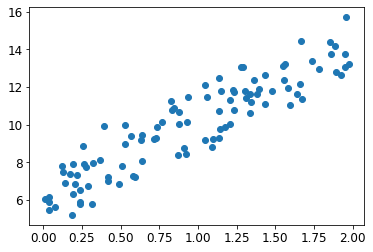

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(theta_1=4, theta_0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)
y = 4 * X + 6 + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y);

데이터는 $y = 4X + 6$을 중심으로 무작위로 퍼져 있다. 다음으로 비용 함수를 정의해 보겠다. 비용 함수 <code>get_cost()</code>는 실제 y 값과 예측된 y 값을 인자로 받아서 $\frac{1}{n}\sum_{i=1}^n(\text{실제값}^{(i)} - \text{예측값}^{(i)})^2$을 계산해 반환한다.

In [16]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

이제 경사 하강법을 <code>gradient_descent()</code>라는 함수를 생성해 구현해 보겠다. <code>gradient_descent()</code>는 $\theta_1$과 $\theta_0$을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 $\theta_1$과 $\theta_0$을 업데이트한다. 즉, $\text{새로운} \theta_1 = \text{이전} \theta_1 + \eta\frac{2}{n}\sum_{i=1}^n x^{(i)}(\text{실제값}^{(i)} - \text{예측값}^{(i)}),\\ \text{새로운}\theta_0 = \text{이전}\theta_0 + \eta\frac{2}{n}\sum_{i=1}^n(\text{실제값}^{(i)} - \text{예측값}^{(i)})$을 반복적으로 적용하면서 $\theta_1$과 $\theta_0$을 업데이트하는 것이다. <code>gradient_descent()</code>는 위에서 무작위로 생성한 X와 y를 입력받는데, X와 y 모두 넘파이 ndarray이다. 넘파이 행렬에 $\theta$를 업데이트하려면 약간의 선형 대수 지식이 필요하다.

여기서 회귀계수 벡터, 가중치 벡터를 지금까진 $\theta$로 사용했으나 코드에서는 편의상 w로 대체하겠다. 즉, $\theta_1$은 $w_1$, $\theta_0$은 $w_0$과 같다고 생각하자.

<code>get_weight_update()</code> 함수에서, 입력 배열 X값에 대한 예측 배열 y_pred는 <code>np.dot(X, w1.T) + w0</code>으로 구한다. 이는 넘파이의 내적 연산을 이용한 것이다. 또한 w1_update로 $-\eta\frac{2}{n}\sum_{i=1}^nx_i\cdot(\text{예측 오류}^{(i)})$를, w0_update로 $-\eta\frac{2}{n}\sum_{i=1}^n(\text{예측 오류}^{(i)})$ 값을 넘파이의 <code>dot</code> 행렬 연산으로 계산한 뒤 이를 반환한다.

In [17]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

다음은 <code>get_weight_updates()</code>을 경사 하강 방식으로 반복적으로 수행하여 w1과 w0를 업데이트하는 함수인 <code>gradient_descent_steps()</code> 함수를 생성하겠다.

In [18]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000, eta=0.01):
    np.random.seed(10)
    # w0와 w1을 모두 무작위 초기화
    w0 = np.random.randn(1, 1)
    w1 = np.random.randn(1, 1)
    w1_arr, w0_arr = list(), list()
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=eta)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        if ind < 10:
            w1_arr.append(w1)
            w0_arr.append(w0)
        
    return w1, w0, w1_arr, w0_arr

이제 <code>gradient_descent_steps()</code>를 호출해 w1과 w0을 구해보겠다. 그리고 최종적으로 예측값과 실제값의 MSE 차이를 계산하는 <code>get_cost()</code> 함수를 호출해 경사 하강법의 예측 오류도 계산해 보겠다.

In [19]:
w1, w0, w1_arr, w0_arr = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.008 w0:6.178
Gradient Descent Total Cost:0.9930


실제 선형식인 $y = 4X + 6$과 유사하게 w1은 4.008, w0는 6.178가 도출되었다. 예측 오류 비용은 약 0.9930이다.

앞에서 구한 y_pred에 기반해 회귀선을 그려 보겠다.

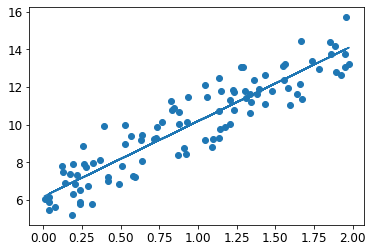

In [20]:
plt.scatter(X, y)
plt.plot(X, y_pred);

다음 그림은 학습률을 바꿔서 학습을 진행했을 때의 그림이다. 세 가지 다른 학습률을 사용하여 진행한 경사 하강법의 처음 10개를 보여준다(빨간 점선은 시작점을 나타냈다).

In [21]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    n = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/n * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

그림 저장: gradient_descent_plot


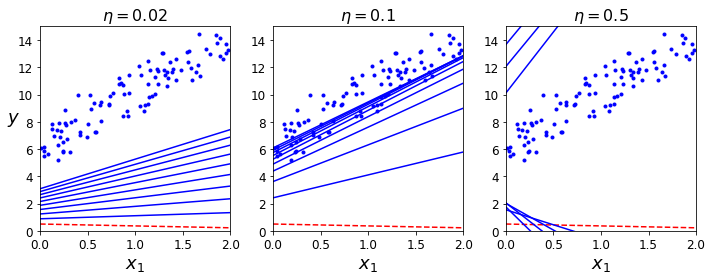

In [22]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

왼쪽은 학습률이 너무 낮다. 알고리즘은 최적점에 도달하겠지만 시간이 오래 걸릴 것이다. 가운데는 학습률이 아주 적당해 보인다. 반복 몇 번 만에 이미 최적점에 거의 수렴했다. 오른쪽은 학습률이 너무 높다. 알고리즘이 이리저리 널뛰면서 스텝마다 최적점에서 점점 더 멀어져 발산한다.

적절한 학습률을 찾으려면 그리드 탐색을 사용한다. 하지만 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야 한다.

반복 횟수가 너무 작으면 최적점에 도달하기 전에 알고리즘이 멈춘다. 반대로 너무 크면 모델 파라미터가 더는 변하지 않는 동안 시간을 낭비하게 된다. 간단한 해결책은 반복 횟수를 아주 크게 지정하고 그레디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값 $\varepsilon$(<b>허용오차</b><sup>tolerance</sup>)보다 작아지면 경사 하강법이 (거의) 최솟값에 도달한 것이므로 알고리즘을 중지하는 것이다.

<div style="border:1px solid; padding:10px;">
    <div style="text-align: center"><strong>수렴율</strong></div><br>
    비용 함수가 볼록 함수이고 기울기가 급격하게 바뀌지 않는 경우 (MSE 비용 함수 같은), 학습률을 고정한 배치 경사 하강법은 어느 정도 시간이 걸리겠지만 결국 최적의 솔루션에 수렴할 것이다. 비용 함수의 모양에 따라 달라지겠지만 $\varepsilon$ 범위 안에서 최적의 솔루션에 도달하기 위해서는 $O(1/\varepsilon)$의 <b>반복</b>이 걸릴 수 있다. 다시 말해 (더 정확한 최솟값을 얻기 위해) 허용 오차 $\varepsilon$을 1/10로 줄이면 알고리즘의 반복은 10배로 늘어날 것이다.
</div>

## 확률적 경사 하강법

배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그레디언트를 계산해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 것이다. 이는 훈련 세트가 커지면 매우 느려지게 된다. 이와는 정반대로 <b>확률적 경사 하강법</b>은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산한다. 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 확실히 훨씬 빠르다. 또한 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있다(SGD는 외부 메모리 학습 알고리즘으로 구현할 수 있다).

반면 확률적(즉, 무작위)이므로 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정하다. 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치며 평균적으로 감소한다. 시간이 지나면 최솟값에 매우 근접하겠지만 요동이 지속되면서 최솟값에 안착하지 못할 것이다(그림 11). 알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 최적치는 아니다.

<b>그림 11</b> 확률적 경사 하강법을 사용하면 개별 훈련 스텝은 매우 빠르지만 배치 경사 하강법을 사용할 때보다 훨씬 더 확률적이 된다.
<div style="text-align:center;">
    <img src="./images/Regression/sgd.png">
</div>

([그림 9]처럼) 비용 함수가 매우 불규칙할 때 알고리즘이 지역 최솟값을 건너뛰도록 도와주므로 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높다.

무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서는 좋지 않다. 이 딜레마를 해결하는 한 가지 방법은 학습률을 점진적으로 감소시키는 것이다. 시작할 때는 학습률을 크게 하고(수렴을 빠르게 하고 지역 최솟값에 빠지지 않게 한다), 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 한다. 이 과정은 금송공학 분야에서 가열한 금속을 천천히 냉각시키는 어닐링<sup>annealing</sup>(풀림) 과정에서 영감을 얻은 <b>담금질 기법</b><sup>simulated annealing</sup> 알고리즘과 유사하다. 매 반복에서 학습률을 결정하는 함수를 <b>학습 스케줄</b><sup>learning schedule</sup>이라고 부른다. 학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈춰버릴 수도 있다. 학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지해서 지역 최솟값에 머무를 수 있다.

다음 코드는 간단한 학습 스케줄을 사용한 확률적 경사 하강법의 구현이다.

그림 저장: sgd_plot


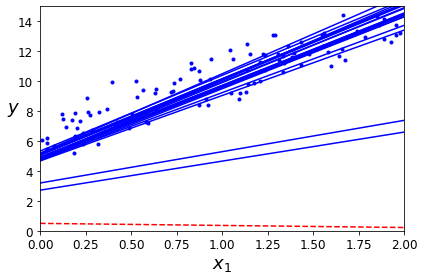

In [23]:
np.random.seed(42)
n = len(X)
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터
theta_path_sgd = []

def learning_schedule(t):
    return t0 / (t + t1)

X_b = np.c_[np.ones((100, 1)), X]
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(n):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(n)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * n + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("sgd_plot")
plt.show()

일반적으로 한 반복에서 훈련 세트에 있는 샘플의 수인 n번 되풀이 되고, 이때 각 반복을 <b>에포크</b><sup>epoch</sup>라고 한다. 배치 경사 하강법 코드가 전체 훈련 세트에 대해 1,000번 반복하는 동안 이 코드는 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달했다.

In [24]:
theta

array([[6.16406355],
       [3.97317797]])

샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수도 있다. 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 (입력 특성과 레이블을 동일하게 섞어야 한다) 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있다.<sup><a id="a08" href="#p08">[8]</a></sup> 그러나 이렇게 하면 보통 더 늦게 수렴된다.

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: red"><strong>CAUTION_</strong></span>확률적 경사 하강법을 사용할 때 훈련 샘플이 IID<sup>independent and identicaaly distributed</sup>를 만족해야 평균적으로 파라미터가 전역 최적점을 향해 진행한다고 보장할 수 있다. 이렇게 만드는 간단한 방법은 훈련하는 동안 샘플을 섞는 것이다(예를 들어, 각 샘플을 랜덤하게 선택하거나 에포크를 시작할 때 훈련 세트를 섞는다). 만약 레이블 순서대로 정렬된 샘플처럼 샘플을 섞지 않은 채로 사용하면 확률적 경사 하강법이 먼저 한 레이블에 최적화하고 그다음 두 번째 레이블을 최적화하는 식으로 진행된다. 결국 이 모델은 최적점에 가깝게 도달하지 못할 것이다.</div>

사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 SGDRegressor 클래스를 사용한다. 다음 코드는 최대 1,000번 에포크 동안 실행된다(max_iter=1000). 또는 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행된다(tol=1e-3). 학습률 0.1(eta0=0.1)로 기본 학습 스케줄(이전과는 다른<sup><a id="a09" href="#p09">[9]</a></sup>)을 사용한다. 규제는 전혀 사용하지 않았다(penalty=None).

In [25]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([6.30509941]), array([4.04924578]))

## 미니배치 경사 하강법

마지막으로 볼 경사 하강법 알고리즘은 <b>미니배치 경사 하강법</b><sup>mini-batch gradient descent</sup>이다. 배치와 확률적 경사 하강법을 알고 있다면 이해하기 매우 쉽다. 각 스텝에서 전체 훈련 세트(배치 경사 하강법에서처럼)나 하나의 샘플(확률적 경사 하강법에서처럼)을 기반으로 그레디언트를 계산하는 것이 아니라 <b>미니배치</b>라 부르는 임의의 작은 샘플 세트에 대해 그레디언트를 계산한다. 확률적 경사 하강법에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상이다.

특히 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직인다. 결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것이다. 하지만 지역 최솟값에서 빠져나오기는 더 힘들지도 모른다(선형 회귀와 같지 않고 지역 최솟값이 문제가 되는 경우). 다음 그림은 세 가지 경사 하강법 알고리즘이 훈련 과정동안 파라미터 공간에서 움직인 경로다. 모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 실제로 최솟갑셍서 멈춘 반면 확률적 경사 하강법과 미니배치 경사 하강법은 근처에서 맴돌고 있다. 그렇지만 배치 경사 하강법에는 매 스텝에서 많은 시간이 소요되고, 확률적 경사 학강법과 미니배치 경사 하강법도 적절한 학습 스케줄을 사용하면 최솟값에 도달하느 것을 잊지 말아야 한다.

In [26]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t= 0 
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(n)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, n, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [27]:
theta

array([[6.25305131],
       [4.00843403]])

In [28]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

그림 저장: gradient_descent_paths_plot


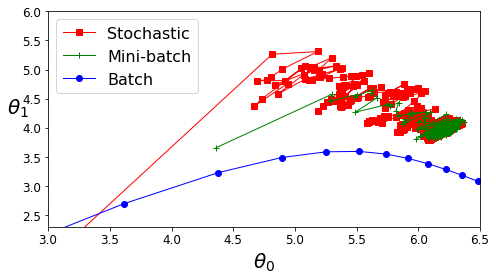

In [29]:
plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=1, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=1, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", rotation=0, fontsize=20)
plt.axis([3, 6.5, 2.3, 6])
save_fig("gradient_descent_paths_plot")
plt.show()

지금까지 논의한 알고리즘을 선형 회귀를 사용해 비교해보겠다(n은 훈련 샘플 수이고 m은 특성 수다).

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-1wig">알고리즘</th>
    <th class="tg-1wig">n이 클 때</th>
    <th class="tg-1wig">외부 메모리 학습 지원</th>
    <th class="tg-1wig">m이 클 때</th>
    <th class="tg-1wig">하이퍼 파라미터 수</th>
    <th class="tg-1wig">스케일 조정 필요</th>
    <th class="tg-1wig">사이킷런</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">정규방정식</td>
    <td class="tg-0lax">빠름</td>
    <td class="tg-0lax">No</td>
    <td class="tg-0lax">느림</td>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">No</td>
    <td class="tg-0lax">N/A</td>
  </tr>
  <tr>
    <td class="tg-0lax">SVD</td>
    <td class="tg-0lax">빠름</td>
    <td class="tg-0lax">No</td>
    <td class="tg-0lax">느림</td>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">No</td>
    <td class="tg-0lax">LinearRegression</td>
  </tr>
  <tr>
    <td class="tg-0lax">배치 경사 하강법</td>
    <td class="tg-0lax">느림</td>
    <td class="tg-0lax">No</td>
    <td class="tg-0lax">빠름</td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">Yes</td>
    <td class="tg-0lax">SGDRegressor</td>
  </tr>
  <tr>
    <td class="tg-0lax">확률적 경사 하강법</td>
    <td class="tg-0lax">빠름</td>
    <td class="tg-0lax">Yes</td>
    <td class="tg-0lax">빠름</td>
    <td class="tg-0lax">≥2</td>
    <td class="tg-0lax">Yes</td>
    <td class="tg-0lax">SGDRegressor</td>
  </tr>
  <tr>
    <td class="tg-0lax">미니배치 경사 하강법</td>
    <td class="tg-0lax">빠름</td>
    <td class="tg-0lax">Yes</td>
    <td class="tg-0lax">빠름</td>
    <td class="tg-0lax">≥2</td>
    <td class="tg-0lax">Yes</td>
    <td class="tg-0lax">SGDRegressor</td>
  </tr>
</tbody>
</table>

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: green"><strong>NOTE_</strong></span>이 알고리즘들은 훈련 결과에 거의 차이가 없다. 모두 매우 비슷한 모델을 만들고 정확히 같은 방식으로 예측을 한다.
</div>

# 다항 회귀

지금까지 설명한 회귀는 $y = \theta_0 + \theta_1x_1 + \cdots + \theta_mx_m$과 같이 독립변수<sup>feature</sup>와 종속변수<sup>target</sup>의 관계가 일차 방정식 형태로 표현된 회귀였다. 하지만 세상의 모든 관계를 직선으로만 표현할 수는 없다. 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 <b>다항 회귀</b><sup>polynomial regression</sup>라고 한다. 즉, 다항 회귀는 $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1x_2 + \theta_4x_1^2+\theta_5x_2^2$과 같이 표현할 수 있다.

한 가지 주의할 점은 다항 회귀를 지선형 회귀로 혼동하기 쉽지만, 다항 회귀는 선형 회귀라는 점이다. 회귀에서 선형 회귀/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관하다. 위의 식 $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1x_2 + \theta_4x_1^2+\theta_5x_2^2$는 새로운 변수인 Z를 $z = [x_1, x_2, x_1x_2, x_1^2, x_2^2]$로 한다면 $y = \theta_0 + \theta_1z_1 + \theta_2z_2 + \theta_3z_3 + \theta_4z_4+\theta_5z_5$와 같이 표현할 수 있기에 여전히 선형 회귀다. [그림 12]를 보면 데이터 세트에 대해서 피처 X에 대해 Target Y 값의 관계를 단순 선형 회귀 직선형으로 표현한 것보다 다항 회귀 곡선형으로 표현한 것이 더 예측 성능이 높다는 것을 알 수 있다.

<b>그림 12</b> 주어진 데이터 세트에서 다항 회귀가 더 효과적이다.
<div style="text-align:center;">
    <img src="./images/Regression/quadratic_predictions_plot.png">
</div>

아쉽지만 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않는다. 대신 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다. 이를 위해 사이킷런은 PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환한다. PolynomialFeatures 클래스는 degree 파라미터를 통해 입력 받은 다항식 피처를 degree에 해당하는 다항식 피처로 변환한다. 다른 전처리 변환 클래스와 마찬가지로 PolynomialFeatures 클래스는 <code>fit()</code>, <code>transform()</code> 메서드를 통해 이 같은 변환 작업을 수행한다. 다음 예제는 PolynomialFeatures를 이용해 단항값 $[x_1, x_2]$를 2차 다항값으로 $[1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$로 변환하는 예제다.

In [30]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 다항식 생성, [[0, 1], [2, 3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 다항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 다항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


단항 계수 피처$[x_1, x_2]$를 2차 다항 계수 $[1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$로 변경하므로 첫 번째 입력 단항 계수 피처 $[x_1=0, x_2=1]$은 $[1, x_1=0, x_2=1, x_1^2=0, x_1x_2=0, x_2^2=1]$ 형태인 [1, 0, 1, 0, 0, 1]로 변환된다. 마찬가지로 두 번째 입력 단항 계수 피처 $[x_1=2, x_2=3]$은 [1, 2, 3, 4, 6, 9]로 변환된다. 이렇게 변환된 Polynomial 피처에 선형 회귀를 적용해 다항 회귀를 구현한다. PolynomialFeatures 클래스가 어떻게 단한식 값을 다항식 값으로 변경하는지 설명했으니, 이번에는 3차 다항 계수를 이용해 3차 다항 회귀 함수식을 PolynomialFeatures와 LinearRegression 클래스를 이용해 유도해 보겠다.

이를 위해 3차 다항 회귀 함수를 임의로 설정하고 이의 회귀 계수를 예측할 것이다. 먼저 3차 다항 회귀의 결정 함수식은 다음과 같이 $y=1 + 2x_1 + 3x_1^2 + 4x_2^3$로 설정하고 이를 위한 함수 <code>polynomial_func()</code>를 만든다. 해당 함수는 3차 다항 계수 피처 값이 입력되면 결정 값을 반환한다.

In [31]:
def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', polynomial_func(X))

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있다(일반적인 선형 회귀 모델에서는 하지 못한다). PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문이다.

이제 일차 단항식 계수를 삼차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하면 다항 회귀로 구현된다. PolynomialFeatrues(degree=3)은 단항 계수 피처 $[x_1, x_2]$를 3차 다항 계수 $[1, x_1, x_2, x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_1^3]$과 같이 10개의 다항 계수로 변환한다.<sup><a id="a10" href="#p10">[10]</a></sup>

In [32]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


일차 단항식 계수 피처는 2개였지만, 3차 다항식 Polynomial 변환 이후에는 다항식 계수 피처가 10개로 늘어난다. 이 피처 데이터 세트에 LinearRegression을 통해 3차 다항 회귀 형태의 다항 회귀를 적용하면 회귀 계수가 10개로 늘어난다. 10개의 회귀 계수 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]가 도출됐으며 원래 다항식 $1 + 2x_1 + 3x_1^2 + 4x_2^3$의 계수 값인 [1, 2, 0, 3, 0, 0, 0, 0, 0, 4]와는 차이가 있지만 다항 회귀로 근사하고 있음을 알 수 있다. 이처럼 사이킷런은 PolynomialFeatures로 피처를 변환한 후에 LinearRegression 클래스로 다항 회귀를 구현한다.

바로 이전 예제와 같이 피처 변환과 선형 회귀 적용을 각각 별도로 하는 것보다는 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현하는 것이 코드를 더 명료하게 작성하는 방법이다.

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: red"><strong>CAUTION_</strong></span><b>PolynomialFeatures(degree=d)</b>는 특성이 m개인 배열을 특성이 $\frac{(m + d)!}{d!m!}$개인 배열로 변환한다.<sup><a id="a10" href="#p10">[11]</a></sup> 여기서 $m!$은 $m$의 <b>팩토리얼</b>로 $1\times2\times3\times\cdots\times m$과 같다. 특성 수가 교차항을 포함해 엄청나게 늘어날 수 있으니 주의해야 한다.</div>

## 주택 데이터셋을 사용한 비선형 관계 모델링

이차 다항식과 삼차 다항식을 사용하여 주택 가격과 LSTAT(저소득 계층의 비율) 사이의 관계를 모델링한 후 선형 모델과 비교한다.

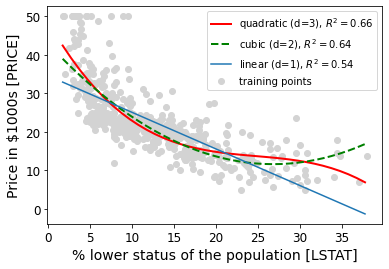

In [145]:
X = bostonDF[['LSTAT']].values
y = bostonDF['PRICE'].values

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
labels = ['quadratic', 'cubic']
styles = ['r-', 'g--']

regr = LinearRegression().fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

for degree, label, style in zip((3, 2), labels, styles):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    regr = LinearRegression()
    regr.fit(X_poly, y)
    y_poly_fit = regr.predict(poly.fit_transform(X_fit))
    poly_r2 = r2_score(y, regr.predict(X_poly))
    
    plt.plot(X_fit, y_poly_fit, style, label='%s (d=%d), $R^2=%.2f$' % (label, degree, poly_r2),
             lw=2)
    
plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2=%.2f$' % linear_r2)
plt.scatter(X, y, label='training points', color='lightgray')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [PRICE]')
plt.legend(loc='upper right')
plt.show()

위 예제 그림에서 볼 수 있듯이 선형과 이차 다항 모델보다 삼차 다항 모델이 주택 가격과 LSTAT 사이의 관계를 잘 잡아냈다. 다항 특성을 많이 추가할수록 모델 복잡도가 높아지고 과대적합의 가능성이 증가한다는 것을 기억하자. 실전에서는 별도의 테스트 세트에서 모델의 일반화 성능을 평가하는 것이 권장된다.

또 다항 특성이 비선형 관계를 모델링하는 데 언제나 최선의 선택은 아니다. 예를 들어 PRICE-LSTAT 산점도를 보면 경험과 직관을 바탕으로 로그 스케일로 변환한 LSTAT 특성과 PRICE의 제곱근은 선형 회귀 모델에 적합한 특성 공간을 구성하리라 추측할 수 있다. 이런 두 변수 사이의 관계는 지수 함수와 매우 비슷할 것 같다.

$$
f(x) = e^{-x}
$$

지수 함수에 자연 로그를 취하면 직선이 되기 때문에 다음과 같은 로그 변환을 적용하는 것이 좋을 것 같다.

$$
\text{log}(f(x)) = -x
$$

다음 코드를 실행하여 이런 가정을 테스트해보자.

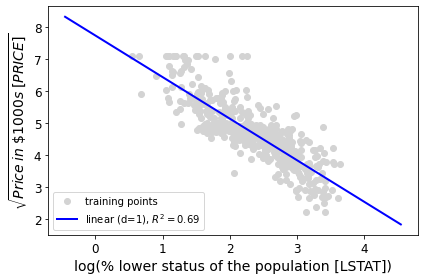

In [151]:
# 특성을 변환한다
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# 학습된 모델을 그리기 위해 특성 범위를 만든다
X_fit = np.arange(X_log.min()-1,
                  X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# 결과 그래프를 그린다
plt.scatter(X_log, y_sqrt,
            label='training points',
            color='lightgray')
plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2=%.2f$' % linear_r2,
         color='blue',
         lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [PRICE]}$')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

특성을 로그 스케일로 변환하고 타깃 값의 제곱근을 취하면 두 변수 사이에서 선형 회귀 관계를 잡을 수 있다. 앞서 만든 어떤 다항 특성 변환보다도 이 데이터에서 학습한 선형 모델$(R^2=0.69)$이 나아 보인다.

## 다항 회귀를 이용한 과소적합 및 과대적합 이해

다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있다. 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하다. 하지만 다항 회귀의 차수<sup>degree</sup>를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어진다. 즉, 차수가 높을수록 과대적합의 문제가 크게 발생한다.

다음은 사이킷런 홈페이지에서 다항 회귀를 이용해 과소적합과 과대적합의 문제를 잘 보여주는 예제가 있어서 발췌한 것이다. 원본은 <a href='https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting' target='blank'>https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting</a>에 있다.

예제에 대해 간략히 설명하자면, 원래 데이터 세트는 피처 X와 target y가 잡음<sup>Noise</sup>이 포함된 다항식의 코사인<sup>Cosine</sup> 그래프 관계를 가지도록 만들어준다. 그리고 이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제다.

학습 데이터는 30개의 임의의 데이터인 X, 그리고 X의 코사인 값에서 약간의 잡음 변동 값을 더한 target인 y로 구성된다.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터이다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값이다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

이제 예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과를 비교하겠다. 다항식 차수별로 학습을 수행한 뒤 <code>cross_val_score()</code>로 MSE 값을 구해 차수별 예측 성능을 평가한다. 그리고 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선을 그려보겠다.


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98294000e+03  1.03899850e+05 -1.87416981e+06  2.03717199e+07
 -1.44874017e+08  7.09319141e+08 -2.47067173e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920643e+09 -1.70382078e+08] 입니다.
Degree 15 MSE 는 182581084.83 입니다.


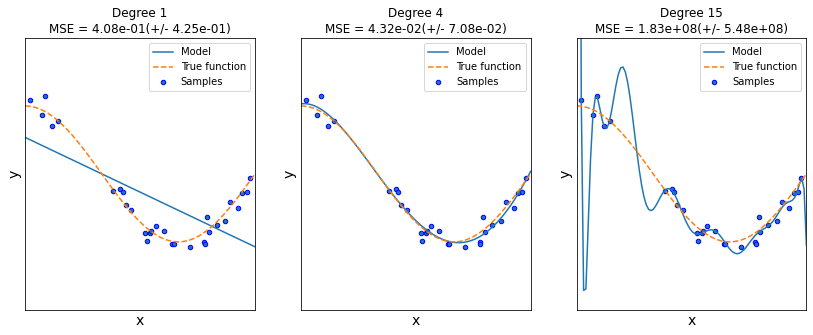

In [35]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교한다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환한다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가한다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행한다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교한다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

실선으로 표현된 예측 곡선은 다항 회귀 예측 곡선이다. 점선으로 표현된 곡선은 실제 데이터 세트 X, Y의 코사인 곡선이다. 학습 데이터는 0부터 1까지의 30개의 임의의 X 값과 그에 따른 코사인 Y 값에 잡음을 변동 값으로 추가해 구성했으며 MSE<sup>Mean Squared Error</sup> 평가는 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균한 것이다.

<ul>
    <li>맨 왼쪽의 Degree 1 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 똑같다. 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순해 보인다. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델이 되었다. MSE 값은 약 4.07이다.</li>
    <li> 가운데 Degree 4 예측 곡선은 실제 데이터 세트와 유사한 모습이다. 변동하는 잡음까지 예측하지는 못했지만, 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 되었다. MSE 값은 약 0.043으로 가장 뛰어난 예측 성능을 나타내고 있다.</li>
    <li> 맨 오른쪽 Degree 15 예측 곡선은 MSE 값이 182815432가 될 정도로 어처구니없는 오류 값이 발생했다(물론 과대적합을 강조하기 위해 Degree를 매우 높은 차수인 15로 설정한 결과다). 예측 곡선을 보면 데이터 세트의 변동 잡음 값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어졌다. 결과적으로 학습 데이터에 너무 충실하게 맞춘 과대적합이 심한 모델이 되었고 어이없는 수준의 높은 MSE 값이 나왔다.</li>
</ul>

Degree 15의 회귀 계수를 살펴보면 회귀 계수의 값이 [-2.98300000e+03 1.03899850e+05 ...]로 Degree 1, 4와 비교할 수 없을 정도로 매우 큰 값임을 알 수 있다. Degree 15라는 복잡한 다항식을 만족하기 위해 계산된 회귀 계수는 결국 현실과 너무 동떨어진 예측 결과를 보여준다.

결국 좋은 예측 모델은 Degree 1과 같이 학습 데이터의 패턴을 지나치게 단순화한 과소적합 모델도 아니고 Degree 15와 같이 모든 학습 데이터의 패턴을 하나하나 감안한 지나치게 복잡한 과대적합 모델도 아닌, 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌<sup>Balanced</sup> 모델을 의미한다.

그러면 얼마나 복잡한 모델을 사용할지 어떻게 결정할 수 있을까? 어떻게 모델이 데이터에 과대적합 또는 과소적합되었는지 알 수 있을까?

앞서 모델의 일반화 성능을 추정하기 위해 <code>cross_val_score()</code>로 교차 검증을 수행했다. 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 모델이 과대적합된 것이다. 만약 양쪽에 모두 좋지 않으면 과소적합이다. 이때 모델이 너무 단순하거나 너무 복잡하다고 말한다.

또 다른 방법은 <b>학습 곡선</b>을 살펴보는 것이다. 이 그래프는 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(또는 훈련 반복)의 함수로 나타낸다. 이 그래프를 생성하기 위해서는 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 된다. 다음 코드는 주어진 훈련 데이터에서 모델의 학습 곡선을 그리는 함수를 정의한다.

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
    train_errors, val_errors = [], []
    for n in range(1, len(X_train)):
        model.fit(X_train[:n], y_train[:n])
        y_train_predict = model.predict(X_train[:n])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:n], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train Set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Valid Set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

단순 선형 회귀 모델(직선)의 학습 곡선을 살펴보자.

(0.0, 20.0, 0.0, 3.0)

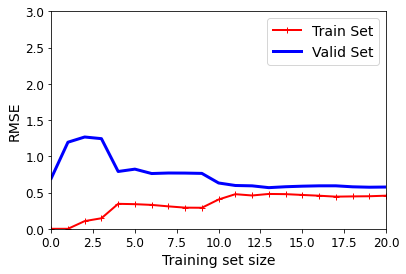

In [37]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X.reshape(-1, 1), y)
plt.axis([0, 20, 0, 3])

과소적합된 이 모델은 조금 설명이 필요하다. 먼저 훈련 데이터의 성능을 보겠다. 그래프가 0에서 시작하므로 훈련 세트에 하나 혹은 두 개의 샘플이 있을 땐 모델이 완벽하게 작동한다. 하지만 훈련 세트에 샘플이 추가됨에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것이 불가능해진다. 그래서 곡선이 어느 정도 평편해질 때까지 오차가 계속 상승한다. 이 위치에서는 훈련 세트에 샘플이 추가되어도 평균 오차가 크게 나아지거나 나빠지지 않는다. 그럼 이제 검증 데이터에 대한 모델의 성능을 보겠다. 모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화될 수 없어서 검증 오차가 매우 크다. 모델에 훈련 샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소한다. 하지만 선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해져서 훈련 세트의 그래프와 가까워진다.

이 학습 곡선이 과소적합 모델의 전형적인 모습이다. 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있다.

<b>TIP</b> 모델이 훈련 데이터에 과소적합되어 있다면 훈련 샘플을 더 추가해도 효과가 없다. 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 한다.

이제 같은 데이터에서 15차 다항 회귀 모델의 학습 곡선을 그려보겠다.

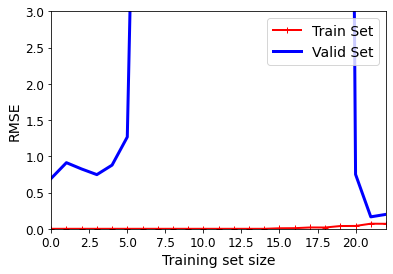

In [38]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X.reshape(-1, 1), y)
plt.axis([0, 22, 0, 3])
plt.show()

훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다. 또한 두 곡선 사이에 공간이 있다. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 이는 과대적합 모델의 특징이다. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다.

<b>TIP</b> 과대적합 모델을 개선하는 한 가지 방법은 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가하는 것이다.

# 규제가 있는 선형 모델

앞의 다항 회귀에서 Degree가 1인 경우는 지나치게 예측 곡선을 단순화해 데이터에 적합하지 않는 과소적합 모델이 만들어졌다. 반대로 Degree 15의 경우는 지나치게 모든 데이터에 적합한 회귀식을 만들기 위해서 다항식이 복잡해지고 회귀 계수가 매우 크게 설정이 되면서 평가 데이터 세트에 대해서 형편없는 예측 성능을 보였다. 따라서 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 한다.

이전까지 선형 모델의 비용 함수는 RSS를 최소화하는, 즉 실제 값과 예측값의 차이를 최소화하는 것만 고려했다. 그러다 보니 학습 데이터에 지나치게 맞추게 되고, 회귀 계수가 쉽게 커졌다. 이럴 경우 변동성이 오히려 심해져서 테스트 데이터 세트에는 예측 성능이 저하되기 쉽다. 이를 반영해 비용 함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과대적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야 한다.

$$
\begin{align*}
\text{Expected MSE} &= E[(Y - \hat{Y})^2|X]\\
 &= \sigma^2 + (E[\hat{Y}] - \hat{Y})^2 + E[\hat{Y} - E[\hat{Y}]]^2\\
 &= \sigma^2 + Bias^2(\hat{Y}) + Var(\hat{Y})\\
 &= \text{Irreducible Error} + \text{Bias}^2 + \text{Variance}
\end{align*}
$$

Expected MSE를 줄이려면 bias, variance 혹은 둘 다 낮춰야 한다. 둘 중에 하나라도 작으면 좋은 편이다. Bias가 증가되더라도 variance 감소폭이 더 크다면 expected MSE는 감소한다(예측 성능이 증가한다).

<b>그림 13</b> 규제 있는 비용함수의 목표
<div style="text-align:center;">
    <img src="./images/Regression/regulation.png">
</div>

이렇게 회귀 계수의 크기를 제어해 과대적합을 개선하려면 비용<sup>Cost</sup> 함수의 목표가 다음과 같이 $\text{RSS}(\mathrm{W}) + \text{alpha} \times ||W||_2^2$를 최소화하는 것으로 변경될 수 있다.

$$
\text{비용 함수 목표} = \text{Min}(\text{RSS}(\mathrm{W}) + \text{alpha} \times ||W||_2^2)
$$

여기서 alpha는 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터다. 비용 함수의 목표가 ($\text{RSS}(\mathrm{W}) + \text{alpha} \times ||W||_2^2$)를 최소화하는 $\mathrm{W}$ 벡터를 찾는 것일 때 alpha가 어떤 역할을 하는지 살펴보겠다.

alpha가 0(또는 매우 작은 값)이라면 비용 함수 식은 기존과 동일한 $\text{Min(RSS}(\mathrm{W}) + 0)$이 될 것이다. 반면에 alpha가 무한대(또는 매우 큰 값)라면 비용 함수 식은 $\text{RSS}(\mathrm{W})$에 비해 $\text{alpha} \times ||\mathrm{W}||_2^2$ 값이 너무 커지게 되므로 $\mathrm{W}$ 값을 0(또는 매우 작게)으로 만들어야 Cost가 최소화되는 비용 함수 목표를 달성할 수 있다. 즉, alpha 값을 크게 하면 비용 함수는 회귀 계수 $\mathrm{W}$의 값을 작게 해 과대적합을 개선할 수 있으며 alpha 값을 작게 하면 회귀 계수 $\mathrm{W}$의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선할 수 있다.

<ul>
    <li>alpha = 0인 경우는 $\mathrm{W}$가 커도 $\text{alpha} \times ||\mathrm{W}||_2^2$가 0이 되어 비용 함수는 $\text{Min(RSS(W))}$</li>
    <li>alpha = 무한대인 경우 $\text{alpha} \times ||\mathrm{W}||_2^2$도 무한대가 되므로 비용 함수는 $\text{W}$를 0에 가깝게 최소화 해야 함.</li>
</ul>

<b>그림 14</b> alpha 튜닝 파라미터를 통한 RSS 최소화와 회귀 계수 크기 감소의 균형 조정
<div style="text-align:center;">
    <img src="./images/Regression/alpha 튜닝.png">
</div>

즉, alpha를 0에서부터 지속적으로 값을 증가시키면 회귀 계수 값의 크기를 감소시킬 수 있다. 이 처럼 비용 함수에 alpha 값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과대적합을 개선하는 방식을 <b>규제</b><sup>Regularization</sup>라고 부른다. 규제는 크기 L2 방식과 L1 방식으로 구분된다. L2 규제는 위에서 설명한 $\text{alpha} \times ||\mathrm{W}||_2^2$와 같이 $\mathrm{W}$의 제곱에 대해 페널티를 부여하는 방식을 말한다. L2 규제를 적용한 회귀를 "릿지" 회귀라고 한다. "라쏘" 회귀는 L1 규제를 적용한 회귀다. L1 규제는 $\text{alpha} \times ||\mathrm{W}||_1$와 같이 $\mathrm{W}$의 절댓값에 대해 페널티를 부여한다. L1 규제를 적용하면 영향력이 크지 않은 회귀 계수 값을 0으로 변환한다. L2와 L1 규제를 함께 결합한 모델인 <b>엘라스틱넷</b><sup>ElasticNet</sup>도 있다. 이 모델은 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정한다. 이들을 하나씩 살펴보도록 하겠다.

## 릿지 회귀

<b>릿지</b><sup>ridge</sup> <b>회귀</b>(또는 <b>티호노프</b><sup>Tikhonov</sup> <b>규제</b>)는 규제가 추가된 선형 회귀 버전이다. 규제항 $\alpha\sum_{i=1}^n\theta_i^2$이 비용 함수에 추가된다. 이는 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력한다. 규제항은 훈련하는 동안에만 비용 함수에 추가된다. 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가한다.<sup><a id="a12" href="p12">[12]</a></sup>

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: green"><strong>NOTE_</strong></span>일반적으로 훈련하는 동안 사용되는 비용 함수와 테스트에서 사용되는 성능 지표는 다르다.  규제를 떠나서 이들이 다른 이유는 훈련에 사용되는 비용 함수는 최적화를 위해 미분 가능해야 하기 때문이다. 반면 테스트에 사용되는 성능 지표는 최종 목표에 가능한 한 가까워야 한다. 로그 손실 같은 비용 함수를 사용하여 훈련시킨 분류기를 정밀도/재현율을 사용하여 평가하는 것이 좋은 예다.
</div>

하이퍼파라미터 $\alpha$는 모델을 얼마나 많이 규제할지 조절한다. $\alpha = 0$이면 릿지 회귀는 선형 회귀와 같아진다. $\alpha$가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다. 다음 식은 릿지 회귀의 비용 함수다.<sup><a id="a13" href="p13">[13]</a></sup>

$$
J(\theta) = \text{MSE}(\theta) + \alpha\frac{1}{2}\sum_{i=1}^m\theta_i^2
$$

편향 $\theta_0$은 규제되지 않는다(합 기호가 $i=0$이 아니고 $i=1$에서 시작한다). $\mathrm{w}$를 특성의 가중치 벡터($\theta_1$에서 $\theta_m$)라고 정의하면 규제항은 $\frac{1}{2}(||\mathrm{w}||_2)^2$과 같다.<sup><a id="a14" href="#p14">[14]</a></sup> 여기서 $||\cdot||_2$가 가중치 벡터의 $l_2$ 노름이다. 경사 하강법에 적용하려면 MSE 그레디언트 벡터에 $\alpha\mathrm{w}$를 더하면 된다.

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: red"><strong>CAUTION_</strong></span>릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요하다(예를 들면 StandardScaler를 사용해서). 규제가 있는 모델은 대부분 마찬가지다.</div>

L2-norm regularization: 제곱 오차를 최소화하면서 회귀 계수 $\theta$의 L2-norm을 제한한다.

$$
\hat{\theta}^{\text{ridge}} = \underset{\theta}{\text{argmin}}\sum_{i=1}^n(y^{(i)} - \theta x^{(i)})^2\\
\text{subject to} \sum_{j=1}^m\theta_j^2 \leq t
$$

위 식은 아래 식과 Lagrangian multiplier로 같다.

$$
\hat{\theta}^{\text{ridge}} = \underset{\theta}{\text{argmin}}\left\{\sum_{i=1}^n(y^{(i)} - \theta x^{(i)})^2 + \lambda\sum_{j=1}^m\theta_j^2 \right\}
$$

이때 위 식의 $t$와 아래 식의 $\lambda$의 역할은 같다.

다음 예제의 그림은 선형 데이터에 몇 가지 다른 $\alpha$를 사용해 릿지 모델을 훈련시킨 결과다. 왼쪽 그래프는 평범한 릿지 모델을 사용해 선형적인 예측을 만들었다. 오른쪽 그래프는 <code>PolynomialFeatures(degree=10)</code>을 사용해 먼저 데이터를 확장하고 StandardScaler를 사용해 스케일을 조정한 후 릿지 모델을 적용했다. 결국 이는 릿지 규제를 사용한 다항 회귀가 된다. $\alpha$를 증가시킬수록 직선에 가까워지는 것을 볼 수 있다. 즉, 모델의 분산은 줄지만 편향은 커지게 된다.

In [39]:
np.random.seed(42)
n = 20
X = 3 * np.random.rand(n, 1)
y = 1 + 0.5 * X + np.random.randn(n, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

그림 저장: ridge_regression_plot


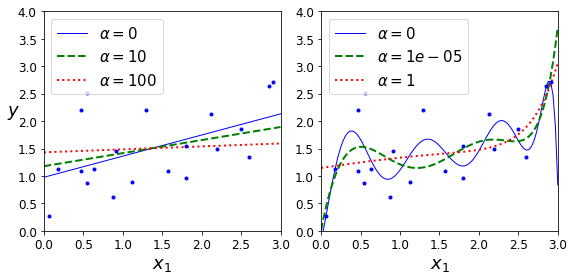

In [40]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])
    
plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

선형 회귀와 마찬가지로 릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고 경사 하강법을 사용할 수도 있다. 장단점은 이전과 같다. 다음 식은 정규방정식의 해다(A는 편향에 해당하는 맨 왼쪽 위의 원소가 0인 $(m+1)\times(m+1)$의 단위행렬<sup>identity matrix</sup><sup><a id="a15" href="#p15">[15]</a></sup>이다).

$$
\hat{\theta} = (\mathrm{X^TX} + \alpha\mathrm{A})^{-1}\mathrm{X}^Ty
$$

다음은 사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예다(안드레 루이 숄레스키<sup>Andre-Louis Cholesky</sup>가 발견한 행렬 분해<sup>matrix factoriaztion</sup><sup><a id="a16" href="#p16">[16]</a></sup>를 사용하여 릿지 회귀의 정규방정식을 변형한 방정식을 사용한다).

In [41]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

다음은 확률적 경사 하강법을 사용했을 때다.<sup><a id="a17" href="#p17">[17]</a></sup>

In [42]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46619232])

penalty 매개변수는 사용할 규제를 지정한다. "l2"는 SGD가 비용 함수에 가중치 벡터의 $l_2$ 노름의 제곱을 2로 나눈 규제항을 추가하게 만든다. 즉, 릿지 회귀와 같다.

### L2 규제의 기하학적 해석

이전 절에서 언급한 대로 L2 규제는 비용 함수에 페널티 항<sup>penalty term</sup>을 추가한다. 규제가 없는 비용 함수로 훈련한 모델에 비해 가중치 값을 아주 작게 만드는 효과를 낸다. L1 규제가 어떻게 희소성을 만드는지 잘 이해하기 위해 한 걸음 물러서서 규제의 기하학적 해석에 대해 고찰해보겠다.

특성이 2개인 즉, $w_1, w_2$인 문제의 SSE 식을 변형해보겠다.

$$
\begin{align*}
\text{SSE}(w_1, w_2) &= \sum_{i=1}^n(y^{(i)} - w_1x_1^{(i)} - w_2x_2^{(i)})^2\\
 &= \sum_{i=1}^ny^{(i)2} - 2\sum_{i=1}^ny^{(i)}(w_1x_1^{(i)} + w_2x_2^{(i)}) + \sum_{i=1}^n(w_1x_1^{(i)} + w_2x_2^{(i)})^2 \\
 &= \sum_{i=1}^ny^{(i)2} -2(\sum_{i=1}^ny^{(i)}x_1^{(i)})w_1 -2(\sum_{i=1}^ny^{(i)}x_2^{(i)})w_2 + \sum_{i=1}^n(w_1^2x_1^{(i)2} + w_2^2x_2^{(i)2} + 2w_1w_2x_1^{(i)}x_2^{(i)})\\
 &= (\sum_{i=1}^nx_1^{(i)2})w_1^2 + (\sum_{i=1}^nx_2^{(i)2})w_2^2 + (2\sum_{i=1}^nx_1^{(i)}x_2^{(i)})w_1w_2 - 2(\sum_{i=1}^ny^{(i)}x_1^{(i)})w_1 - 2(\sum_{i=1}^ny^{(i)}x_2^{(i)})w_2 + \sum_{i=1}^ny^{(i)2}\\
 &= Aw_1^2 + Bw_1w_2 + Cw_2^2 + Dw_1 + Ew_2 + F 
\end{align*}
$$

$$
Aw_1^2 + Bw_1w_2 + Cw_2^2 + Dw_1 + Ew_2 + F = 0\\
\text{Discriminant of conic equation (판별식):} B^2 -4AC
$$

위 판별식의 값에 따라 다음 조건을 만족한다.
<ul>
    <li>$B^2 - 4AC = 0 \to \text{parabola(포물선)}$</li>
    <li>$B^2 - 4AC > 0 \to \text{hyperbola(쌍곡선)}$</li>
    <li>$B^2 - 4AC < 0 \to \text{ellipse(타원)}$</li>
    <li>$B = 0 and A=C \to \text{circle(원)}$</li>
</ul>

위 SSE를 정리한 식을 이용해 판별식을 진행하면 다음과 같다.

$$
\begin{align*}
B^2 - 4AC &= (2\sum_{i=1}^nx_1^{(i)}x_2^{(i)})^2 - 4\sum_{i=1}^nx_1^{(i)2}\sum_{i=1}^nx_2^{(i)2}\\
 &= 4\left\{(\sum_{i=1}^nx_1^{(i)}x_2^{(i)})^2 - \sum_{i=1}^nx_1^{(i)2}\sum_{i=1}^nx_2^{(i)2}\right\} < 0\,(\because \text{Cauchy-Schwartz inequality})
\end{align*}
$$

$$
\therefore \text{SSE는 타원이다.}
$$

위 과정으로 두 개의 가중치 값 $w_1$과 $w_2$에 대한 볼록한 비용 함수의 등고선을 그려 보자. 우리의 목표는 훈련 데이터에서 비용 함수를 최소화하는 가중치 값의 조합을 찾는 것임을 기억하자(타원의 중심 포인트).

<b>그림 15</b> 가중치 평면에 투영된 볼록 비용 함수의 등고선
<div style="text-align:center;">
    <img src="./images/Regression/minimizeJ.png">
</div>

규제를 더 작은 가중치를 얻기 위해 비용 함수에 추가하는 페널티 항으로 생각할 수 있다. 다른 말로 하면 큰 가중치를 제한한다.

규제 파라미터 $\lambda$로 규제의 강도를 크게 하면 가중치가 0에 가까워지고 훈련 데이터에 대한 모델 의존성은 줄어든다. L2 페널티 항에 대한 이 개념을 [그림 16]에 나타내 보자.

<b>그림 16</b> L2 규제와 비용 함수
<div style="text-align:center;">
    <img src="./images/Regression/l2.png">
</div>

이차식인 L2 규제 항은 회색 공으로 표현되어 있다. 가중치 값은 규제 예산을 초과할 수 없다. 즉, 가중치 값의 조합이 회색 공 바깥에 놓일 수 없다. 반면 우리는 여전히 비용 함수를 최소화해야 한다. 페널티 제약이 있는 상황에서 최선은 L2 회색 공과 규제가 없는 비용 함수의 등고선이 만나는 지점이다. 규제 파라미터 $\lambda$가 커질수록 페널티 비용이 빠르게 증가하여 L2 공을 작게 만든다. 예를 들어 규제 파라미터를 무한대로 증가하면 가중치 값이 L2 공의 중심인 0이 될 것이다. 이 예시에서 중요한 핵심을 정리하면 우리의 목표는 규제가 없는 비용과 페널티 항의 합을 최소화하는 것이다. 이는 모델을 학습할 만한 충분한 훈련 데이터가 없을 때 편향을 추가하여 모델을 간단하게 만듦으로써 분산을 줄이는 것으로 해석할 수 있다.

### 보스턴 주택 가격 데이터 세트의 적용

사이킷런은 Ridge 클래스를 통해 릿지 회귀를 구현한다. Ridge 클래스의 주요 생성 파라미터는 alpha이며, 이는 릿지 회귀의 alpha L2 규제 계수에 해당한다. 보스턴 주택 가격을 Ridge 클래스를 이용해 예측하고, 예측 성능을 <code>cross_val_score()</code>로 평가해 보겠다.

In [43]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()

bostonDF = pd.DataFrame(data=boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target

X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
y_target = bostonDF['PRICE']

In [44]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score

def model_fit_predict(model, alpha=None):
    model = model(alpha=alpha) if alpha is not None else model()
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print('\n** {0} 모델의 결과 **'.format(model))
    print('5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
    print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
    print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))
    
model_fit_predict(LinearRegression)
model_fit_predict(Ridge, alpha=10)


** LinearRegression() 모델의 결과 **
5 folds 의 개별 Negative MSE scores :  [-12.46  -26.049 -33.074 -80.762 -33.314]
5 folds 의 개별 RMSE scores :  [3.53  5.104 5.751 8.987 5.772]
5 folds 의 평균 RMSE : 5.829

** Ridge(alpha=10) 모델의 결과 **
5 folds 의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
5 folds 의 평균 RMSE : 5.518


릿지의 5개 폴드 세트의 평균 RMSE가 5.518이다. 규제가 없는 LinearRegression의 RMSE 평균인 5.829보다 더 뛰어난 예측 성능을 보여준다.

이번에는 릿지의 alpha 값을 0, 0.1, 1, 10, 100으로 변화시키면서 RMSE와 회귀 계수 값의 변화를 살펴보겠다. alpha 값을 변화하면서 RMSE 값과 각 피처의 회귀 계수를 시각화하고 DataFrame에 저장하는 예제다. 예제의 결과에서 보겠지만, 릿지 회귀는 alpha 값이 커질수록 회귀 계수 값을 작게 만든다. 먼저 alpha 값의 변화에 따른 5 폴드의 RMSE 평균값을 반환하는 코드부터 작성하겠다.

In [45]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    # cross_val_score()를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330


alpha가 100일 때 평균 RMSE가 5.330으로 가장 좋다. 이번에는 alpha 값의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화해 보겠다. 회귀 계수를 Ridge 객체의 coef_ 속성으로 추출한 뒤에 Series 객체로 만들어서 Seaborn 가로 막대 차트로 표시하고, DataFrame에 alpha 값별 회귀 계수로 저장한다.

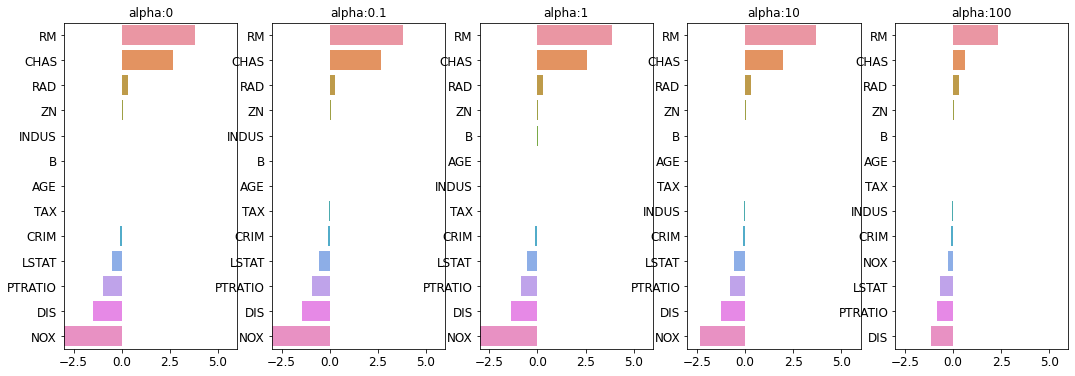

In [46]:
import seaborn as sns

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯릿 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

alpha 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아짐을 알 수 있다. 특히 NOX 피처의 경우 alpha 값을 계속 증가시킴에 따라 회귀 계수가 크게 작아지고 있다. DataFrame에 저장된 alpha 값의 변화에 따른 릿지 회귀 계수 값을 구해 보겠다.

In [47]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


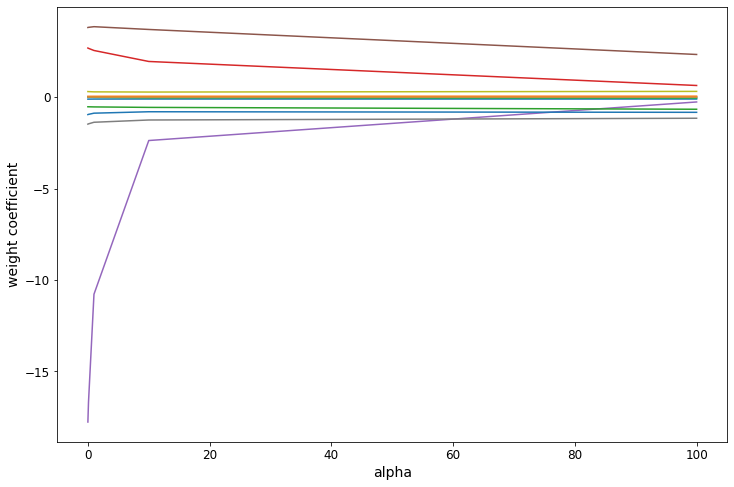

In [48]:
fig = plt.figure(figsize=(12, 8))

for index in coeff_df.index:
    plt.plot(ridge_alphas, coeff_df.loc[index])
    
plt.xlabel('alpha')
plt.ylabel('weight coefficient')
plt.show()

alpha 값이 증가하면서 회귀 계수가 지속적으로 작아지고 있음을 알 수 있다. 하지만 릿지 회귀의 경우에는 회귀 계수를 0으로 만들지는 않는다.

## 라쏘 회귀

$\mathrm{W}$의 절댓값에 페널티를 부여하는 L1 규제를 선형 회귀에 적용한 것이 <b>라쏘</b><sup>Least Absolute Shrinkage and Selection Operator</sup> 회귀다. 즉 L1 규제는 $\text{alpha}\times ||\mathrm{W}||_1$를 의미하며, 라쏘 회귀 비용함수의 목표는 $\text{RSS}(\mathrm{W}) + \text{alpha}\times ||\mathrm{W}||_1$ 식을 최소화하는 $\mathrm{W}$를 찾는 것이다. L2 규제가 회귀 계수에 비례한 크기를 감소시키는 데 반해, L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거한다. 이러한 측면에서 L1 규제는 적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 가지고 있다.

다음은 라쏘 회귀의 비용 함수다.

$$
\mathrm{J}(\theta) = \text{MSE}(\theta) + \alpha\sum_{i=1}^m|\theta_i|
$$

L1-norm regularization은 회귀 계수 $\theta$의 L1-norm을 제한한다.

$$
\hat{\theta}^{\text{lasso}} = \underset{\theta}{\text{argmin}}\sum_{i=1}^n(y_i - x_i\theta)^2\\
\text{subject to}\sum_{j=1}^p|\theta_j|\leq t
$$

위 식은 다음과 같다.

$$
\hat{\theta}^{\text{lasso}} = \underset{\theta}{argmin}{\sum_{i=1}^n(y_i - x_i\theta)^2 + \lambda\sum_{j=1}^p|\theta_j|}
$$

Ridge와 달리 Lasso formulation은 L1 norm이 미분 불가능하므로 closed form solution을 구하는 것이 불가능하다. 따라서 다음과 같은 수치 최적화 방법을 사용하여 해를 구한다.

<ul>
    <li>Quadratic programming techniques</li>
    <li>LARS algorithm</li>
    <li>Coordinate descent algorithm</li>
</ul>

Lasso의 파라미터인 $\lambda$값에 따라서 다음과 같이 생각할 수 있다.

큰 $\lambda$값을 가질 경우, 규제항의 값이 커져 대부분의 특성 값들이 0이 되어 해석이 쉬운 간단한 모델이 된다. 다만, 이는 높은 학습 오차(즉 높은 편향)를 가져서 언더피팅의 위험이 존재한다.

작은 $\lambda$값을 가질 경우, 기본 선형 회귀(Ordinary least square)와 비슷해지므로 특성값들이 대부분 살아남고 해석이 어려운 복잡한 모델이 된다. 이 모델은 학습 오차는 낮지만, 오버피팅 위험이 높아 일반화 오류가 커진다.

다음 예제의 그림은 릿지 모델 대신 라쏘 모델과 조금 더 작은 $\alpha$값을 사용했다.

그림 저장: lasso_regression_plot


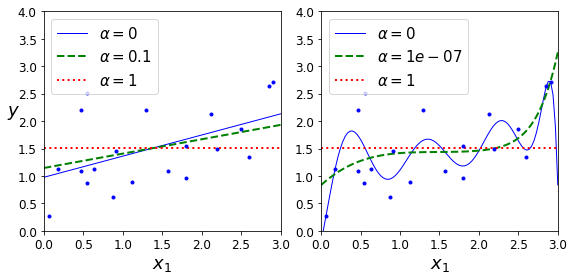

In [49]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 제거하려고 한다는 점이다(즉, 가중치가 0이 된다). 예를 들어 위 그림의 오른쪽 그래프에서 점선($\alpha=1e-7$)은 3차방정식처럼 보인다. 차수가 높은 다항 특성의 가중치가 모두 0이 되었다. 다시 말해 라쏘 회귀는 자동으로 특성 선택을 하고 <b>희소 모델</b><sup>sparse model</sup>을 만든다(즉, 0이 아닌 특성의 가중치가 적다).

### L1 규제의 기하학적 해석

L1 페널티는 가중치 절댓값의 합이기 때문에 [그림 17]과 같이 다이아몬드 모양의 제한 범위를 그릴 수 있다(L2 항은 이차식이라는 것을 기억하자).

<b>그림 17</b> L1 규제와 비용 함수
<div style="text-align:center;">
    <img src="./images/Regression/l1.jpg">
</div>

[그림 17]에서 $w_1 = 0$일 때 비용 함수의 등고선이 L1 다이아몬드와 만나는 것을 볼 수 있다. L1 규제의 등고선은 날카롭기 때문에 비용 함수의 포물선과 L1 다이아몬드의 경계가 만나는 최적점은 축에 가깝게 위치할 가능성이 높다. 이것이 희소성이 나타는 이유다.

[그림 18]을 보면 이를 쉽게 이해할 수 있다. 두 축은 모델 파라미터 두 개를 나타내고 배경의 등고선은 각기 다른 손실 함수를 나타낸다. 왼쪽 위 그래프의 등고선은 $l_1$ 손실($|\theta_1| + |\theta_2|$)을 나타낸다. 축에 가까워지면서 선형적으로 줄어든다. 예를 들어 모델 파라미터를 $\theta_1=2, \theta_2=0.5$로 초기화하고 경사 하강법을 실행하면 두 파라미터가 동일하게 감소될 것이다(노란 점선). 따라서 $\theta_2$가 먼저 0에 도달한다($\theta_2$가 시작할 때 0에 더 가깝기 때문이다). 그다음 경사 하강법이 $\theta_1=0$에 도달할 때까지 축을 따라 내려갔다($l_1$의 그레디언트는 0에서 정의되지 않기 때문에 진동이 조금 있다. 이 지점에서 그레디언트는 -1 또는 1이다). 오른쪽 위 그래프의 등고선은 라쏘 손실 함수를 나타낸다(즉 $l_1$ 손실을 더한 MSE 손실 함수). 하얀 작은 원이 경사 하강법이 $\theta_1=0.25, \theta_2=-1$로 초기화된 모델 파라미터를 최적화하는 과정을 보여준다. 여기에서도 $\theta_2=0$으로 빠르게 줄어들고 그다음 축을 따라 진동하면서 전역 최적점(빨간 사각형)에 도달한다. $\alpha$가 증가하면 전역 최적점이 노란 점선을 따라 왼쪽으로 이동한다. $\alpha$가 감소하면 전역 최적점이 오른쪽으로 이동한다(이 예에서 규제가 없는 MSE의 최적 파라미터는 $\theta_1=2, \theta_2=0.5$이다).

In [73]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

그림 저장: lasso_vs_ridge_plot


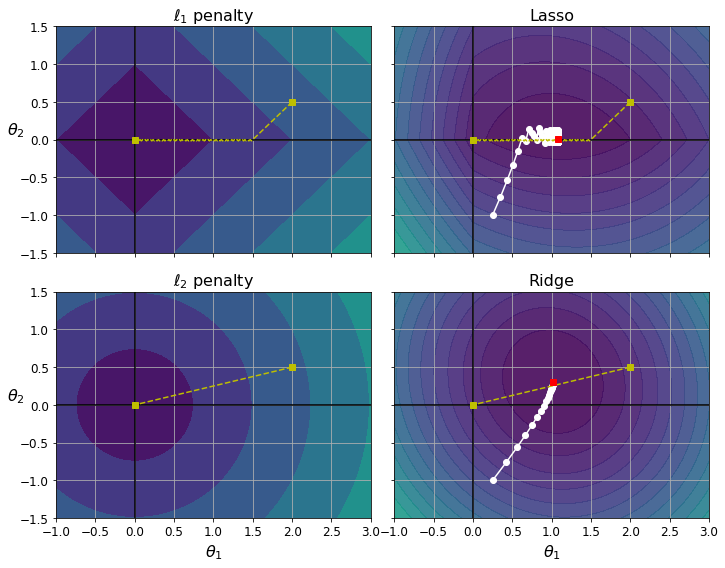

In [110]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

save_fig("lasso_vs_ridge_plot")
plt.show()

아래 두 개의 그래프도 동일하지만 $l_2$ 페널티를 사용한다. 왼쪽 아래 그래프에서 $l_2$ 손실은 원점에 가까울수록 줄어드는 것을 볼 수 있다. 따라서 경사 하강법이 원점까지 직선 경로를 따라 간다. 오른쪽 아래 그래프의 등고선은 릿지 회귀의 비용 함수를 나타낸다(즉 $l_2$ 손실을 더한 MSE 손실 함수). 라쏘와 다른 점은 크게 두 가지다. 첫째 파라미터가 전역 최적점에 가까워질수록 그레디언트가 작아진다. 따라서 경사 하강법이 자동으로 느려지고 수렴에 도움이 된다(진동이 없다). 둘째 $\alpha$를 증가시킬수록 최적의 파라미터(빨간 사각형)가 원점에 더 가까워진다. 하지만 완전히 0이 되지는 않는다.

<b>TIP</b> 라쏘를 사용할 때 경사 하강법이 최적점 근처에서 진동하는 것을 막으려면 훈련하는 동안 점진적으로 학습률을 감소시켜야 한다(여전히 최적점 근처에서 진동하겠지만 스텝이 갈수록 작아지므로 수렴하게 될 것이다).

라쏘의 비용 함수는 $\theta_i=0(i=1, 2, ..., n)$에서 미분 불가능하다. 하지만 $\theta_i=0$일 때 <b>서브그레디언트 벡터</b><sup>subgradient vector</sup> $\mathrm{g}$를 사용하면 경사 하강법을 적용하는 데 문제가 없다. 서브그레디언트 벡터는 미분이 불가능한 지점 근방 그레디언트들의 중간값으로 생각할 수 있다. 다음 식은 경사 하강법을 위해 라쏘 비용 함수에 사용할 수 있는 서브그레디언트 벡터 공식이다.

$$
g(\theta, J) = \triangledown_\theta\text{MSE}(\theta) + \alpha\begin{pmatrix}
\text{sign}(\theta_1) \\
\text{sign}(\theta_1) \\
\vdots \\
\text{sign}(\theta_m)\end{pmatrix}\,, \text{sign}(\theta_j)\begin{cases}
-1 & \text{ if } \theta_j<0\\
0 & \text{ if } \theta_j = 0\\
+1 & \text{ if } \theta_j > 0 
\end{cases}
$$

### 보스턴 주택 가격 데이터 세트의 적용

사이킷런은 Lasso 클래스를 통해 라쏘 회귀를 구현하였다. Lasso 클래스의 주요 생성 파라미터는 alpha이며, 이는 라쏘 회귀의 alpha L1 규제 계수에 해당한다. 이 Lasso 클래스를 이용해 이전 절의 릿지 회귀 예제 코드와 유사하게 라쏘의 alpha 값을 변화시키면서 RMSE와 각 피처의 회귀 계수를 출력해 보겠다. 뒤에서 설명하는 엘라스틱넷도 동일하게 alpha값을 변화시키면서 결과를 출력할 것이므로 이의 수행을 위한 별도의 함수를 만들겠다. <code>get_linear_reg_eval()</code>는 인자로 회귀 모델의 이름, alpha들의 리스트, 피처 데이터 세트와 타깃 데이터 세트를 입력 받아서 alpha값에 따른 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환한다. 다음 예제 코드는 <code>get_linear_reg_eval()</code> 함수를 구현한 것이며, 이전 절의 릿지 예제 코드와 크게 다르지 않다.

In [50]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('###### ', model_name, '######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                         y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:' + str(param)
            coeff_df[colname] = coeff
            
    return coeff_df

함수를 생성했으면 이를 이용해 alpha값의 변화에 따른 RMSE와 그때의 회귀계수들을 출력해 보겠다. alpha값은 [0.07, 0.1, 0.5, 1, 3]로 입력하겠다. <code>get_linear_reg_eval()</code>에 모델명을 'Lasso'로 입력하면 라쏘 모델 기반으로 수행한다.

In [51]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

######  Lasso ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


alpha가 0.07일 때 가장 좋은 평균 RMSE를 보여준다. 앞의 릿지 평균 5.518보다는 약간 떨어지는 수치지만, LinearRegression 평균인 5.829보다는 향샹됐다. 다음은 alpha 값에 따른 피처별 회귀 계수다.

In [52]:
# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


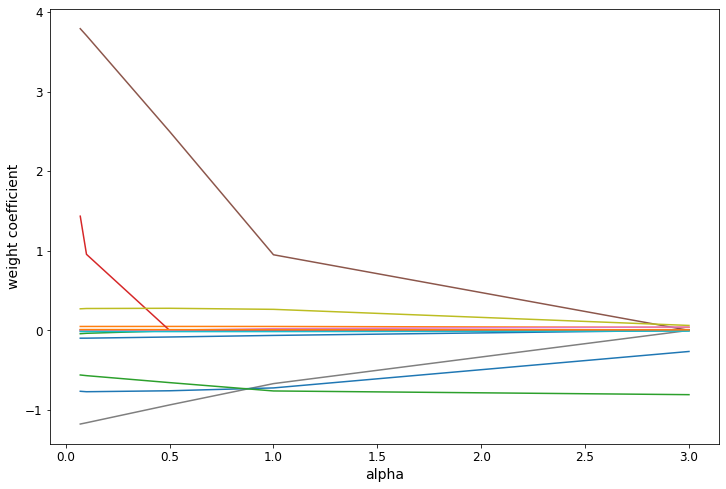

In [53]:
fig = plt.figure(figsize=(12, 8))

for index in coeff_lasso_df.index:
    plt.plot(lasso_alphas, coeff_lasso_df.loc[index])
    
plt.xlabel('alpha')
plt.ylabel('weight coefficient')
plt.show()

alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀌고 있다. NOX 속성은 alpha가 0.07일 때부터 회귀 계수가 0이며, alpha를 증가시키면서 INDUS, CHAS와 같은 속성의 회귀 계수가 0으로 바뀐다. 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있다.

## 엘라스틱넷 회귀

<b>엘라스틱넷</b><sup>Elastic Net</sup> 회귀는 L2 규제와 L1 규제를 결합한 회귀다. 따라서 엘라스틱넷 회귀 비용함수의 목표는 $\text{RSS}(\mathrm{W}) + \text{alpha}2 \times||\mathrm{W}||_2^2 + \text{alpha}1\times||\mathrm{W}||_1$ 식을 최소화하는 $\mathrm{W}$를 찾는 것이다. 엘라스틱넷은 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강하다. 특히 이러한 성향으로 인해 alpha 값에 따라 회귀 계수 값이 급격히 변동할 수도 있는데, 엘라스틱넷 회귀는 이를 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것이다. 반대로 엘라스틱넷 회귀의 단점은 L1과 L2 규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸린다는 것이다.

규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절한다. r=0이면 엘라스틱넷은 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같다.<sup><a id="a18" href="#p18">[18]</a></sup> 

$$
\mathrm{J(\theta)} = \text{MSE}(\theta) + r\alpha\sum_{i=1}^m|\theta_i| + \frac{1-r}{2}\alpha\sum_{i=1}^m\theta_i^2
$$

엘라스틱넷의 규제항은 다음과 같다.

$$
\hat{\theta}^{\text{enet}} = \underset{\theta}{\text{argmin}}\sum_{i=1}^n(y_i - x_i\theta)^2\\
\text{subject to}\,s_1\sum_{j=1}^p|\theta_j| + s_2\sum_{j=1}^p\theta_j^2 \leq t
$$

다음 식은 위의 식과 동등하다.

$$
\hat{\theta}^{\text{enet}} = \underset{\theta}{\text{argmin}}{\sum_{i=1}^n(y_i - x_i\theta)^2 + \lambda_1\sum_{j=1}^p|\theta_j| + \lambda_2\sum_{j=1}^p\theta_j^2}
$$

엘라스틱넷 추정기에 대해 다음 부등식이 성립한다.

$$
|\hat{\theta_i}^{\text{enet}} - \hat{\theta_j}^{\text{enet}}| \leq\frac{\sum_{i=1}^n|y_i|}{\lambda_2}\sqrt{2(1 - \rho_{ij})}\\
\rho_{ij}: x_i와 x_j의 상관계수
$$

$$
\rho_{ij} = 1 \to |\hat{\theta_i}^{\text{enet}} - \hat{\theta_j}^{\text{enet}}| \leq 0\\
\to\hat{\theta_i}^{\text{enet}} = \hat{\theta_j}^{\text{enet}}
$$

$$
\rho_{ij}\uparrow or \lambda_2 \uparrow\,\, \to |\hat{\theta_i}^{\text{enet}} - \hat{\theta_j}^{\text{enet}}| \downarrow
$$

사이킷런은 ElasticNet 클래스를 통해서 엘라스틱넷 회귀를 구현한다. ElasticNet 클래스의 주요 생성 파라미터는 alpha와 l1_ratio다. ElasticNet 클래스의 alpha는 Ridge와 Lasso 클래스의 alpha값과는 다르다. 엘라스틱넷의 규제는 $a \times L1 + b \times L2$로 정의될 수 있으며, 이 때 $a$는 L1 규제의 alpha값, $b$는 L2 규제의 alpha 값이다. 따라서 ElasticNet 클래스의 alpha 파라미터 값은 $a + b$이다. ElasticNet 클래스의 l1_ratio 파라미터 값은 $\frac{a}{a + b}$이다. l1_ratio가 0이면 $a$가 0이므로 L2 규제과 동일하다. l1_ratio가 1이면 $b$가 0이므로 L1 규제와 동일하다. l1_ratio가 0과 1사이의 값을 가지면 L1과 L2 규제를 적절히 사용하는 것이다. 보통 일정 범위 내로 GridSearch로 가장 좋은 예측 결과를 보이는 파라미터 값을 선정한다.

ElasticNet 클래스를 이용해 바로 이전의 릿지, 라쏘 회귀 예제 코드와 유사하게 엘라스틱넷 alpha 값을 변화시키면서 RMSE와 각 피처의 회귀 계수를 출력해 보겠다. 앞에서 생성한 <code>get_linear_reg_eval()</code> 함수를 이용하겠다. 먼저 해당 함수를 호출하기 전에 잠시 주지해야 할 점이 있다. 앞의 <code>get_linear_reg_eval()</code>를 생성한 예제를 잠시 돌아 보면 <code>elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)</code>으로 ElasticNet 객체를 생성할 때 l1_ratio를 0.7로 고정했다. 이는 단순히 alpha값의 변화만 살피기 위함으로 l1_ratio를 미리 고정했음을 밝혀둔다.

In [54]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                       X_data_n=X_data, y_target_n=y_target)

######  ElasticNet ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [55]:
# 반환된 coeff_elastic_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


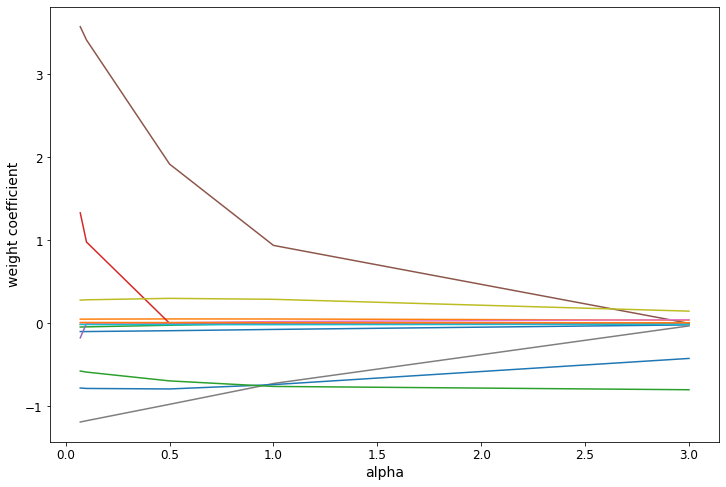

In [56]:
fig = plt.figure(figsize=(12, 8))

for index in coeff_lasso_df.index:
    plt.plot(elastic_alphas, coeff_elastic_df.loc[index])
    
plt.xlabel('alpha')
plt.ylabel('weight coefficient')
plt.show()

alpha가 0.5일 때 RMSE가 5.467로 가장 좋은 예측 성능을 보이고 있다. alpha값에 따른 피처들의 회귀 계수들 값이 라쏘보다는 상대적으로 0이 되는 값이 적음을 알 수 있다.

지금까지 규제 선형 회귀의 가장 대표적인 기법인 릿지, 라쏘, 엘라스틱넷 회귀를 살펴봤다. 이들 중 어떤 것이 가장 좋은지는 상황에 따라 다르다. 적어도 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적으로 평범한 선형 회귀는 피해야 한다. 릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다. 이 모델들은 이전에 이야기한 것처럼 불필요한 특성의 가중치를 0으로 만들어 준다. 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 라쏘보다는 엘라스틱넷을 선호한다.<sup><a id="a19" href="#p19">[19]</a></sup>

그럼에도 각각의 알고리즘에서 하이퍼 파라미터를 변경해 가면서 최적의 예측 성능을 찾아내야 한다. 하지만 선형 회귀의 경우 최적의 하이퍼 파라미터를 찾아내는 것 못지않게 먼저 데이터 분포도의 정규화와 인코딩 방법이 매우 중요하다.

# 선형 회귀 모델을 위한 데이터 변환

선형 회귀 모델과 같은 선형 모델은 일반적으로 피처와 타깃값 간에 선형의 관계가 있다고 가정하고, 이러한 최적의 선형함수를 찾아내 결과값을 예측한다. 또한 선형 회귀 모델은 피처값과 타깃값의 분포가 정규 분포(즉 평균을 중심으로 종 모양으로 데이터 값이 분포된 형태) 형태를 매우 선호한다. 특히 타깃값의 경우 정규 분포 형태가 아니라 특정값의 분포가 치우친 왜곡<sup>Skew</sup>된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높다. 피처값 역시 결정값보다는 덜하지만 왜곡된 분포도로 인해 예측 성능에 부정적인 영향을 미칠 수 있다. 따라서 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적이다. 하지만 이러한 스케일링/정규화 작업을 선행한다고 해서 무조건 예측 성능이 향상되는 것은 아니다. 일반적으로 중요 피처들이나 타깃값의 분포도가 심하게 왜곡됐을 경우에 이러한 변환 작업을 수행한다.

일반적으로 피처 데이터 세트와 타깃 데이터 세트에 이러한 스케일링/정규화 작업을 수행하는 방법이 조금은 다르다. 먼저 사이킷런을 이용해 피처 데이터 세트에 적용하는 변환 작업은 다음과 같은 방법이 있을 수 있다.

<ol>
    <li>StandardScaler 클래스를 이용해 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나 MinMaxScaler 클래스를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화를 수행한다.</li>
    <li>스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환하는 방법이다. 보통 1번 방법을 통해 예측 성능에 향상이 없을 경우 이와 같은 방법을 적용한다.</li>
    <li>원래 값에 log 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포된다. 이러한 변환을 로그 변환<sup>Log Transformation</sup>이라고 부른다. 로그 변환은 매우 유용한 변환이며, 실제로 선형 회귀에서는 앞에서 소개한 1, 2번 방법보다 로그 변환이 훨씬 많이 사용되는 변환 방법이다. 왜냐하면 1번 방법의 경우 예측 성능 향상을 크게 기대하기 어려운 경우가 많으며 2번 방법의 경우 피처의 개수가 매우 많을 경우에는 다항 변환으로 생성되는 피처의 개수가 기하급수로 늘어나서 과대적합의 이슈가 발생할 수 있기 때문이다.</li>
</ol>

선형 회귀의 데이터 인코딩은 일반적으로 레이블 인코딩이 아니라 원-핫 인코딩을 적용한다. 타깃값의 경우는 일반적으로 로그 변환을 적용한다. 결정 값을 정규 분포나 다른 정규값으로 변환하면 변환된 값을 다시 원본 타깃값으로 원복하기 어려울 수 있다. 무엇보다도, 왜곡된 분포도 형태의 타깃값을 로그 변환하여 예측 성능 향상이 된 경우가 많은 사례에서 검증되었기 때문에 타깃값의 경우는 로그 변환을 적용한다. 즉, 회귀에서 타깃값은 반드시 정규분포를 가져야 하며 이를 위해 주로 로그 변환을 적용한다고 볼 수 있다.

보스턴 주택가격 피처 데이터 세트에 위에서 언급한 표준 정규 분포 변환, 최댓값/최솟값 정규화, 로그 변환을 차례로 적용한 후에 RMSE로 각 경우별 예측 성능을 측정해 보겠다. 이를 위해 <code>get_scaled_data()</code> 함수를 생성한다. 해당 함수는 method 인자로 변환 방법을 결정하며 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그 변환(Log) 중에 하나를 선택한다. p_degree는 다항식 특성을 추가할 때 다항식 차수가 입력된다. 다항식 차수는 2를 넘기지 않는다. 그리고 고르 변환인 경우 예제 코드에서 <code>np.log()</code>가 아니라 <code>np.log1p()</code>를 이용했다. 일반적으로 <code>log()</code> 함수를 적용하면 언더 플로우가 발생하기 쉬워서 <code>1 + log()</code> 함수를 적용하는데 이를 구현한 것이 <code>np.log1p()</code>이다.

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그 변환(Log)
# p_degree는 다항식 특성을 추가할 때 적용, p_degree는 2이상 부여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                         include_bias=False).fit_transform(scaled_data)
        
    return scaled_data

이제 Ridge 클래스의 alpha값을 변환시키면서 피처 데이터 세트를 여러 가지 방법으로 변환한 데이터 세트를 입력 받을 경우에 RMSE값이 어떻게 변하는지 살펴보겠다. 앞에서 생성한 <code>get_linear_reg_eval()</code> 함수를 다시 이용하겠다. 피처 데이터의 변환 방법은 모두 5가지다. 먼저 (None, None)은 아무런 변환을 하지 않은 원본 데이터, ('Standard', None)은 표준 정규 분포, ('Standard', 2)는 표준 정규 분포를 다시 2차 다항식 변환, ('MinMax', None)은 최솟값/최댓값 정규화, ('MinMax', 2)는 최솟값/최댓값 정규화를 다시 2차 다항식 변환, ('Log', None)은 로그 변환이다. 

In [58]:
# Ridge의 alpha 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출.
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분포, 표준정규 분포 + 다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2),
                 ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
                        y_target_n=y_target, verbose=False, return_coeff=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538 

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴

결과를 보면 표준 덩규 분포와 최솟값/최댓값 정규화로 피처 데이터 세트를 변경해도 성능상의 개선은 없다. 표준 정규 분포로 일차 변환 후 2차 다항식 변환을 했을 때 alpha=100에서 4.634로 성능이 개선됐으며 최솟값/최댓값 정규화로 일차 변환 후 2차 다항식 변환을 했을 때 alpha=1에서 4.323으로 성능이 개선됐다. 하지만 다항식 변환은 앞에서 언급한 단점으로 인해 피처의 개수가 많을 경우 적용하기 힘들며, 또한 데이터 건수가 많아지면 계산에 많은 시간이 소모되어 적용에 한계가 있다. 반면에 로그 변환을 보면 alpha가 0.1, 1, 10인 경우에 모두 좋은 성능 향상이 있음을 알 수 있다.

일반적으로 선형 회귀를 적용하려는 데이터 세트에 데이터 값의 분포가 심하게 왜곡되어 있을 경우에 이처럼 로그 변환을 적용하는 것이 좋은 결과를 기대할 수 있다.

# 미주

<b id="p01">1</b> 편의상 벡터 표현으로 모델 파라미터와 특성을 모두 표현하기 위해 편향 $\theta_0$에 가상의 특성 $x_0=1$이 곱해졌다고 생각한다. [↩](#a01)

<b id="p02">2</b> 최종 모델을 평가하는 데 사용하는 성능 측정 지표 말고 학습 알고리즘이 다른 함수를 최적화하는 경우가 종종 있다. 일반적으로 성능 측정 지표에는 없는 유용한 미분 특성이 있어서 이런 함수가 계산하기 더 쉽거나, 훈련하는 동안 모델에 제약을 가하기 위해 사용한다. [↩](#a02)

<b id="p03">3</b> 사이킷런은 특성의 가중치(coef_)와 편향(intercept_)을 분리하여 저장한다. [↩](#a03)

<b id="p04">4</b> $\mathrm{X}$를 (샘플 수, 특성 수)인 $n\times m$ 행렬이라 할 때 $\mathrm{X^TX}$는 $(m\times n)\times(n \times m)=(m\times m)$ 크기의 행렬이 되므로 샘플 수($n$)가 역행렬 계산의 복잡도를 증가시키지 않고 점곱의 양만 선형적으로 증가시킨다. [↩](#a04)

<b id="p05">5</b> 두 점을 이은 선분이 두 점사이에서 항상 곡선 위에 위치할 경우를 볼록 함수, 아래에 위치할 경우 오목 함수라고 한다. [↩](#a05)

<b id="p06">6</b> 기술적으로 말하면 이 함수의 도함수가 <b>립시츠 연속</b><sup>Lipschitz continuous</sup>이다. 어떤 함수의 도함수가 일정한 범위 안에서 변할 때 이 함수를 립시츠 연속 함수라고 한다. 예를 들어 $\text{sin}(x)$는 립시츠 연속 함수지만 $\sqrt{x}$는 $x=0$일 때 기울기가 무한대가 되므로 립시츠 연속 함수가 아니다. MSE는 $x$가 무한대일 때 기울기가 무한대가 되므로 국부적인(locally) 립시츠 함수라고 한다. [↩](#a06)

<b id="p07">7</b> 특성 1이 더 작기 때문에 비용 함수에 영향을 주기 위해서는 $\theta_1$이 더 크게 바뀌어야 한다. 그래서 $\theta_1$ 축을 따라서 길쭉한 모양이 된다. 이 그래프에서 비용 함수가 지면에 수직인 축이라고 생각하면 3차원 볼록 함수의 그릇 모양을 이해하기 쉽다. [↩](#a07)

<b id="p08">8</b> 사이킷런의 SGDClassifier와 SGDRegressor가 사용하는 방법이다. [↩](#a08)

<b id="p09">9</b> SGDRegressor에서 학습 스케줄을 의미하는 매개변수 learning_rate의 기본값은 'invscaling'으로 반복 횟수 t와 eta0, power_t 두 매개변수(기본값은 각각 0.01, 0.25)를 사용한 다음 공식으로 학습률을 계산한다.
$$
\eta^{(t)} = \frac{\text{eta}()}{t^{\text{power_t}}}
$$
SGDClassifier의 learning_rate 기본값은 'optimal'로 다음 공식을 사용한다.
$$
\eta^{(t)} = \frac{1}{\text{alpha}(t_0 + t)}
$$
여기서 $t_0$는 페이스북 머신러닝 연구원인 레옹 보투가 제안한 값으로, alpha 매개변수와 비용 함수에 따라 결정된다. [↩](#a09)

<b id="p10">10</b> PolynomialFeatures에서 interaction_only=True로 지정하면 거듭제곱이 포함된 항은 모두 제외된다. 즉 a, b, ab만 남는다. PolynomialFeatures의 객체에서 <code>get_feature_names()</code> 메서드를 호출하면 만들어진 특성의 차수를 쉽게 확인할 수 있다. [↩](#a10)

<b id="p11">11</b> 이 식을 중복을 허락한 조합의 공식으로 표현하면 다음과 같다.
$$
\frac{(m + d)!}{d!m!} = \binom{m + d}{d} = \binom{m + 1 + d - 1}{d} = \begin{pmatrix}
\binom{m+1}{d}\end{pmatrix}
$$
다시 점화식으로 나타내면 다음과 같다.
$$
\begin{pmatrix}
\binom{m+1}{d}\end{pmatrix} = \begin{pmatrix}
\binom{m}{d}\end{pmatrix} + \begin{pmatrix}
\binom{m+1}{d-1}\end{pmatrix}
$$
두 번째 항에 점화식을 계속하여 적용하면 다음과 같다.
$$
\frac{(m+d)!}{d!m!} = \begin{pmatrix}
\binom{m+1}{d}\end{pmatrix} = \begin{pmatrix}
\binom{m}{d}\end{pmatrix} + \begin{pmatrix}
\binom{m}{d-1}\end{pmatrix} + \begin{pmatrix}
\binom{m}{d-2}\end{pmatrix} + \cdots + \begin{pmatrix}
\binom{m}{1}\end{pmatrix} + \begin{pmatrix}
\binom{m+1}{0}\end{pmatrix}
$$
따라서 $\frac{(m+d)!}{d!m!}$는 $m$개의 특성에서 0부터 $d$개까지 뽑을 수 있는 중복 조합의 합이 된다. [↩](#a11)

<b id="p12">12</b> 규제는 비용 함수에 추가되는 것으로, 테스트 세트에서 성능을 평가하거나 실제 샘플을 예측할 때는 포함되지 않는다. [↩](#a12)

<b id="p13">13</b> 간단한 별칭이 없어서 보통 비용 함수를 $J(\theta)$로 표기한다. 비용 함수를 $J$로 표기하는 것은 각각의 훈련 데이터를 하나의 벡터 함수로 보았을 때 각 가중치에 대한 도함수를 행렬로 표현한 야코비 행렬<sup>Jacobian matrix</sup>의 첫 글자에서 따온 것으로 알려져 있다. [↩](#a13)

<b id="p14">14</b> 규제항에 $\frac{1}{2}$를 곱한 것은 미분 결과를 간단하게 만들기 위해서다. [↩](#a14)

<b id="p15">15</b> 단위행렬은 주대각선(왼쪽 위에서 오른쪽 아래)이 1이고 그 외에는 모두 0인 정방행렬이다. 편향에 해당하는 $\theta_0$은 규제에 포함되지 않으므로 단위행렬의 주대각선 첫 번째 원소가 0이 되어야 한다. [↩](#a15)

<b id="p16">16</b> 숄레스키 분해<sup>Choesky decomposition</sup>라고도 하며 어떤 행렬 A가 대칭이고 양의 정부호 행렬<sup>positive definite matrix</sup>일 경우 $\mathrm{A = LL^T}$로 분해된다. 여기에서 $\mathrm{L}$는 하삼각 행렬<sup>lower triangular matrix</sup>이다. 이를 이용해 정규방정식을 $(\mathrm{X^TX + \alpha A})\hat{\theta} = (\mathrm{LL^T})\hat{\theta} = \mathrm{X^Ty}$로 바꾸어 $\hat{\theta}$을 구할 수 있다. 숄레스키 분해를 사용하는 장점은 성능이다. Ridge의 solver 매개변수의 기본 값은 'auto'이며 희소 행렬이나 특이 행렬<sup>singular matrix</sup>이 아닐 경우 'cholesky'가 된다. [↩](#a16)

<b id="p17">17</b> 대안으로 Ridge에 solver="sag"를 사용할 수 있다. 확률적 평균 경사 하강법<sup>stochastic average gradient descent</sup>은 SGD의 변종이다. sag는 확률적 경사 하강법과 거의 비슷하지만 현재 그레디언트와 이전 스텝에서 구한 모든 그레디언트를 합해서 평균한 값으로 모델 파라미터를 갱신한다. 사이킷런의 0.19 버전에는 sag의 개량 버전인 saga 알고리즘이 추가되었다. [↩](#a17)

<b id="p18">18</b> 사실 사이킷런의 Lasso 클래스는 l1_ratio=1.0인 ElasticNet 클래스를 사용한다. 하지만 l1_ratio=0인 ElasticNet과 Ridge 클래스는 서로 다르다. [↩](#a18)

<b id="p19">19</b> 라쏘는 특성 수가 샘플 수(n)보다 많으면 최대 n개의 특성을 선택한다. 또한 여러 특성이 강하게 연관되어 있으면 이들 중 임의의 특성 하나를 선택한다. [↩](#a19)